In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import reverse_geocoder as rg
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso,Ridge, LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn import metrics
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Studies\DataScience\DataTrained\DataTrained_Classes\FlipRobo\FlipRobo2\ProjectEvaluation\Phase2\temperature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
# Checking the dimension of data
print('We have {} rows and {} columns in our dataframe'.format(*df.shape))
print('\n')
# Checking the column names in our dataframe
print('Columns in our dataframe are:\n', df.columns)

We have 7752 rows and 25 columns in our dataframe


Columns in our dataframe are:
 Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')


In [4]:
# Checking data datatypes
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
# Understanding data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
# Converting Date datatypes and spliting date into date, month and year.
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin   Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2  30.0   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5  30.0   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9  30.0   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3  30.0   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5  30.0   

   Month    Year  
0    6.0  2013.0  
1    6.0  2013.0  
2    6.0  2013.0  
3    6.0  2013.0  
4    6.0  2013.0  

[5 rows x 28 columns]

In [7]:
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
Day                        float64
Month                      float64
Year                       float64
dtype: object

In [8]:
df.shape

(7752, 28)

In [9]:
# Dropping Date column
df.drop('Date', axis=1, inplace = True)

df.shape

(7752, 27)

In [10]:
#Checking Missing Values
print("Total Missing Values in our Dataframe are: ", df.isnull().sum().sum())
print('\n')
# Checking for Missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

Total Missing Values in our Dataframe are:  1252


                  Missing Values  % Missing data
LDAPS_PPT1                    75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT3                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC3                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
Present_Tmax                  70        0.902993
Present_Tmin                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Month             

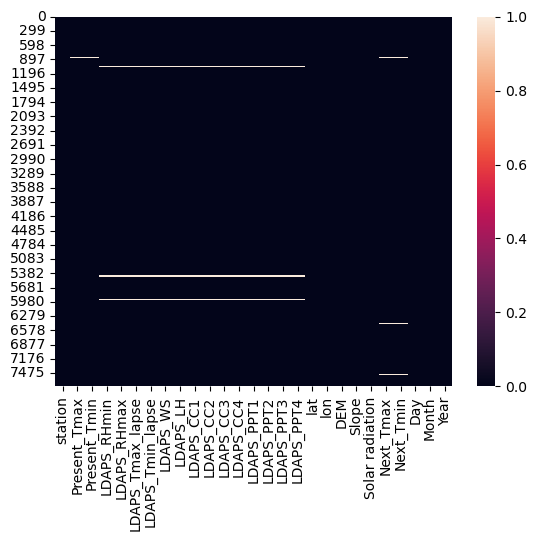

In [11]:
#Visualization it
sns.heatmap(df.isnull())
plt.show()

In [12]:
print("We had {} Rows and {} Columns before dropping null values.".format(*df.shape))

# Dropping Nan Values
df.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(*df.shape))

We had 7752 Rows and 27 Columns before dropping null values.
We have 7588 Rows and 27 Columns after dropping null values.


In [13]:
# Calculating Data Loss after removing nan Values
col_before_removing_nulls=7752
col_after_removing_nulls = 7588
Data_Loss = (col_before_removing_nulls - col_after_removing_nulls) / col_before_removing_nulls * 100
print(f"There is {Data_Loss} % dataloss after removing null values")

There is 2.1155830753353975 % dataloss after removing null values


In [14]:
#checking missing values after removing it
print("Total Missing Values in our Dataframe are: ", df.isnull().sum().sum())
print('\n')
df.isnull().sum()

Total Missing Values in our Dataframe are:  0




station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

In [15]:
# Duplicate Values in our Dataframe
print("Total Duplicate Values in our Dataframe are: ", df.duplicated().sum())

Total Duplicate Values in our Dataframe are:  0


In [16]:
#Let check if any whitespace, 'NA' or '-' exist in dataset
df.isin([' ','NA','-']).sum().any()

False

In [17]:
#  createing additional columns with location
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(df['lat'], df['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
# Creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

Loading formatted geocoded file...


In [18]:
#Creating 2 New Columns State & City
df['State']= geo_names[0].apply(lambda x:x.get('admin1'))
df['City']=geo_names[0].apply(lambda x:x.get('name'))

In [19]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101         23.006936  6.818887   69.451805   0.233947  ...   
1         29.850689         24.035009  5.691890   51.937448   0.225508  ...   
2         30.091292         24.565633  6.138224   20.573050   0.209344  ...   
3         29.704629         23.326177  5.650050   65.727144   0.216372  ...   
4         29.113934         23.486480  5.735004  107.965535   0.151407  ...   

        DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin   Day  Month  \
0  212.3350  2.7850      5992.895996       29.1       21.2  30.0    6.0   
1   44.7624  0.5141      5869.312500       30.5       22.5  30.0    6.0   
2   33.3068  0.2661      5863.555664       31.1       23.9  30.0    6.0   
3   45.7160  2.5348      5856.964844       31.7       24.3  30.0    6.0   
4   35.0380  0.5055      5859.552246       31.2       22.5  30.0    6.0   

     Year        State     City  
0  2013.0        Seoul    Seoul  
1  2013.0        Seoul    Seoul  
2  2013.0        Seoul    Seoul  
3  2013.0        Seoul    Seoul  
4  2013.0  Gyeonggi-do  Guri-si  

[5 rows x 29 columns]

In [20]:
df.shape

(7588, 29)

In [21]:
#checking description
df.describe().T


count         mean         std          min          25%  \
station           7588.0    13.014101    7.217858     1.000000     7.000000   
Present_Tmax      7588.0    29.748366    2.967401    20.000000    27.800000   
Present_Tmin      7588.0    23.195809    2.400880    11.300000    21.600000   
LDAPS_RHmin       7588.0    56.724969   14.626559    19.794666    45.960243   
LDAPS_RHmax       7588.0    88.360823    7.199456    58.936283    84.203724   
LDAPS_Tmax_lapse  7588.0    29.620128    2.943496    17.624954    27.673756   
LDAPS_Tmin_lapse  7588.0    23.511786    2.342579    14.272646    22.086820   
LDAPS_WS          7588.0     7.094097    2.177034     2.882580     5.675358   
LDAPS_LH          7588.0    62.492606   33.686158   -13.603212    37.206201   
LDAPS_CC1         7588.0     0.368510    0.262260     0.000000     0.146546   
LDAPS_CC2         7588.0     0.355528    0.257922     0.000000     0.140324   
LDAPS_CC3         7588.0     0.317546    0.249833     0.000000     0.100950   
LDAPS_CC4         7588.0     0.298268    0.253392     0.000000     0.081495   
LDAPS_PPT1        7588.0     0.589008    1.927577     0.000000     0.000000   
LDAPS_PPT2        7588.0     0.480738    1.743327     0.000000     0.000000   
LDAPS_PPT3        7588.0     0.275007    1.146087     0.000000     0.000000   
LDAPS_PPT4        7588.0     0.265373    1.179661     0.000000     0.000000   
lat               7588.0    37.544792    0.050428    37.456200    37.510200   
lon               7588.0   126.991420    0.079220   126.826000   126.937000   
DEM               7588.0    61.918136   54.323529    12.370000    28.700000   
Slope             7588.0     1.259755    1.372748     0.098500     0.271300   
Solar radiation   7588.0  5343.724208  429.782561  4329.520508  5001.485717   
Next_Tmax         7588.0    30.241526    3.111807    17.400000    28.200000   
Next_Tmin         7588.0    22.910820    2.482256    11.300000    21.300000   
Day               7588.0    16.337375    8.216880     7.000000     8.000000   
Month             7588.0     7.068134    2.242389     1.000000     7.000000   
Year              7588.0  2014.991697    1.410877  2013.000000  2014.000000   

                          50%          75%          max  
station             13.000000    19.000000    25.000000  
Present_Tmax        29.900000    32.000000    37.600000  
Present_Tmin        23.400000    24.800000    29.900000  
LDAPS_RHmin         55.023199    67.115099    98.524734  
LDAPS_RHmax         89.784122    93.742725   100.000153  
LDAPS_Tmax_lapse    29.709537    31.711109    38.542255  
LDAPS_Tmin_lapse    23.758249    25.155660    29.619342  
LDAPS_WS             6.547838     8.028960    21.857621  
LDAPS_LH            56.898324    84.235666   213.414006  
LDAPS_CC1            0.315706     0.574174     0.967277  
LDAPS_CC2            0.311676     0.557164     0.968353  
LDAPS_CC3            0.261795     0.496444     0.983789  
LDAPS_CC4            0.227459     0.498127     0.974710  
LDAPS_PPT1           0.000000     0.052594    23.701544  
LDAPS_PPT2           0.000000     0.017735    21.621661  
LDAPS_PPT3           0.000000     0.007855    15.841235  
LDAPS_PPT4           0.000000     0.000017    16.655469  
lat                 37.550700    37.577600    37.645000  
lon                126.995000   127.042000   127.135000  
DEM                 45.716000    59.832400   212.335000  
Slope                0.618000     1.767800     5.178200  
Solar radiation   5441.987305  5729.485840  5992.895996  
Next_Tmax           30.400000    32.600000    38.900000  
Next_Tmin           23.100000    24.600000    29.800000  
Day                 16.000000    24.000000    31.000000  
Month                7.000000     8.000000    12.000000  
Year              2015.000000  2016.000000  2017.000000

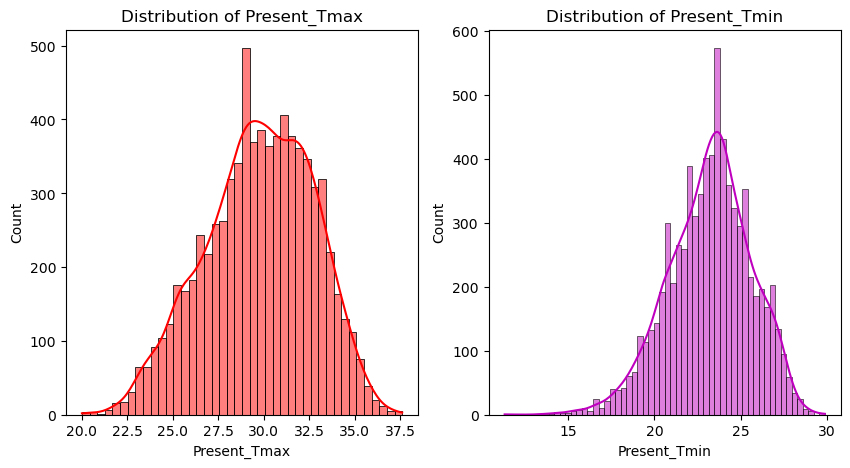

In [22]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize=(10,5))

#First Plot: Distribution of Present_Tmax
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='r')
plt.title("Distribution of Present_Tmax")

# Second Plot: Distribution of Present_Tmin
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='m')
plt.title("Distribution of Present_Tmin")

plt.show()

In [23]:
# Let's determine the maximum and minimum temperatures over the specified period.

print('Present Maximum Temperature Maxima in year 2013-2016 :',df.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',df.Present_Tmax.min())
print('Average Present Maximum Temperature in year 2013-2016 :',df.Present_Tmax.mean())
print('='*75)
print('Present Minimum Temperature Maxima in year 2013-2016 :',df.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',df.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',df.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
Average Present Maximum Temperature in year 2013-2016 : 29.748365840801263
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377437


In [24]:
# Checking Present_Tmax Maximum
pd.set_option('display.max_columns', None)
df.loc[df.Present_Tmax==df.Present_Tmax.max()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
5717     18.0          37.6          26.8    44.254253    87.745514   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
5717         34.794021         27.150764  6.366598  111.225118   0.218892   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
5717   0.094288   0.004283   0.000343         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon      DEM   Slope  Solar radiation  \
5717         0.0  37.4832  127.024  56.4448  1.2313      5082.563477   

      Next_Tmax  Next_Tmin  Day  Month    Year        State        City  
5717       37.0       27.8  8.0   11.0  2016.0  Gyeonggi-do  Bucheon-si

In [25]:
# Checking  Present_Tmax Minimum
df.loc[df.Present_Tmax==df.Present_Tmax.min()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7725      1.0          20.0          15.1    35.652172     89.97319   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
7725         24.323737         16.128899  7.087329  108.981108   0.046182   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
7725   0.014955        0.0    0.00063         0.0         0.0         0.0   

      LDAPS_PPT4      lat      lon      DEM  Slope  Solar radiation  \
7725         0.0  37.6046  126.991  212.335  2.785       4614.76123   

      Next_Tmax  Next_Tmin   Day  Month    Year State City  
7725       23.8       15.1  30.0    8.0  2017.0   NaN  NaN

In [26]:
# Checking  Present_Tmin Maximum
df.loc[df.Present_Tmin==df.Present_Tmin.max()]


station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
2397     23.0          35.3          29.9    53.946949    85.985161   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
2397         30.912804         25.439537  13.011129  117.837212   0.684685   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
2397   0.448827   0.762858   0.635728    1.670126    0.005681    0.248885   

      LDAPS_PPT4      lat      lon      DEM   Slope  Solar radiation  \
2397    0.003176  37.5372  126.891  15.5876  0.1554      5360.226563   

      Next_Tmax  Next_Tmin  Day  Month    Year        State     City  
2397       31.3       24.8  8.0    2.0  2014.0  Gyeonggi-do  Guri-si

In [27]:
# Checking  Present_Tmax Minimum
df.loc[df.Present_Tmin==df.Present_Tmin.min()]

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
6116     17.0          27.1          11.3    62.793823    91.726936   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
6116         23.529546         17.963487  7.984566  84.48145   0.668264   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
6116   0.410536   0.452879   0.627238    0.181458         0.0    0.405181   

      LDAPS_PPT4      lat      lon      DEM  Slope  Solar radiation  \
6116    1.015573  37.6181  127.099  53.4712  0.697      4539.616699   

      Next_Tmax  Next_Tmin   Day  Month    Year  State   City  
6116       24.6       17.1  27.0    8.0  2016.0  Seoul  Seoul

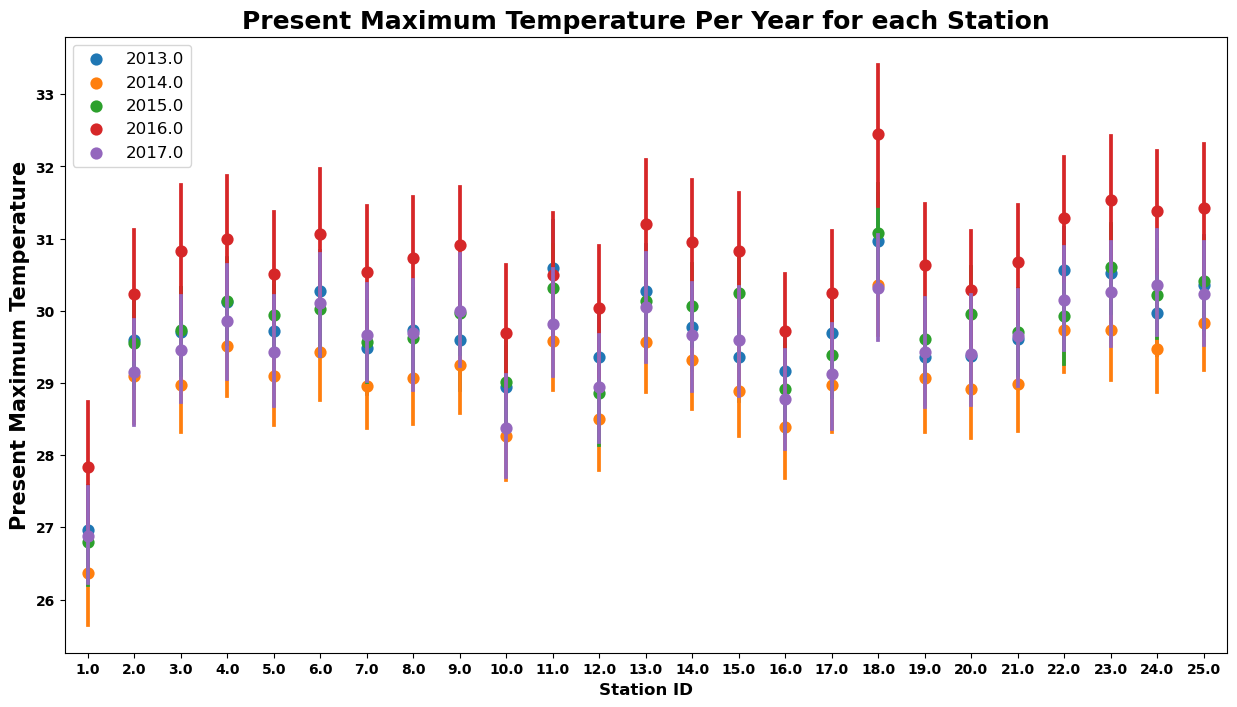

In [28]:
#Line Plot of Present Temperature Maximum over each Station
plt.figure(figsize=(15,8))
sns.pointplot(x='station', y='Present_Tmax', data=df, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=18, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':12,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=10,fontweight ='bold')
plt.yticks(fontsize=10,fontweight ='bold')
plt.legend(fontsize=12)
plt.show()

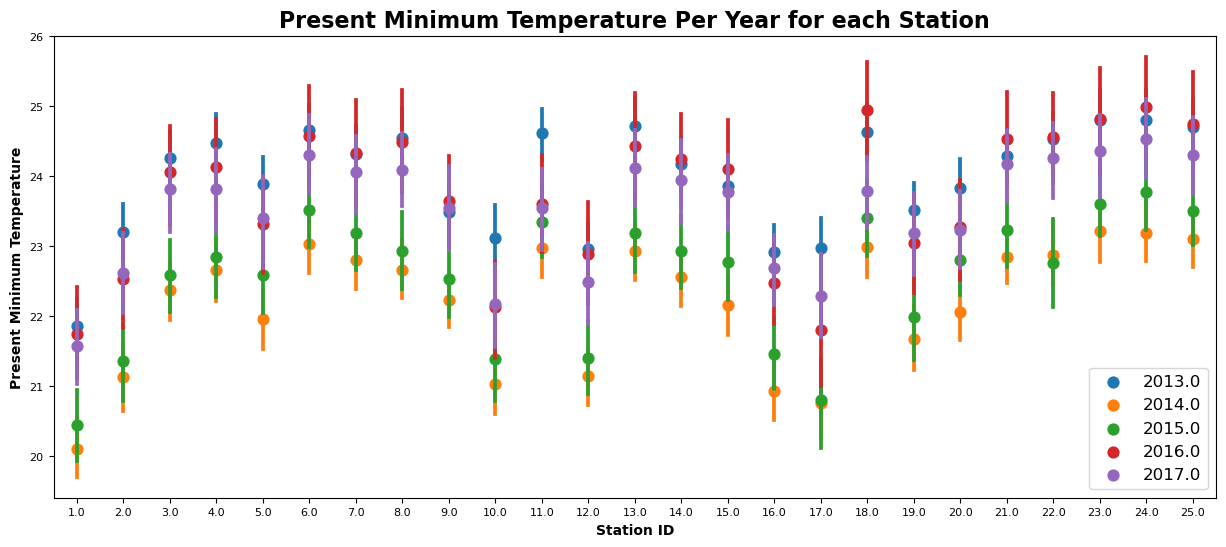

In [29]:
# Line Plot of Present Temperature Minimum over each Station
plt.figure(figsize=(15,6))

sns.pointplot(x='station', y='Present_Tmin', data=df, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=16, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':10,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':10,'fontweight' :'bold'})
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(fontsize=12)
plt.show()

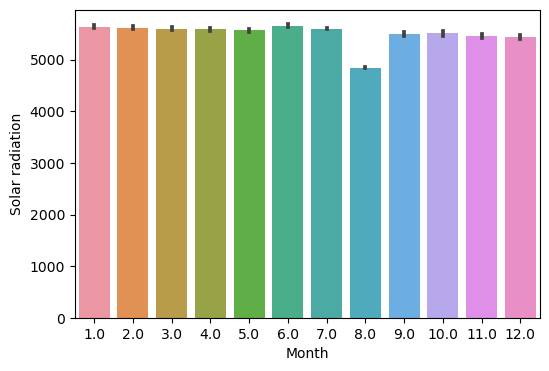

In [30]:
# Month Vs Solar radiation
plt.figure(figsize=(6,4))
sns.barplot(x=df['Month'], y=df['Solar radiation'])
plt.show()

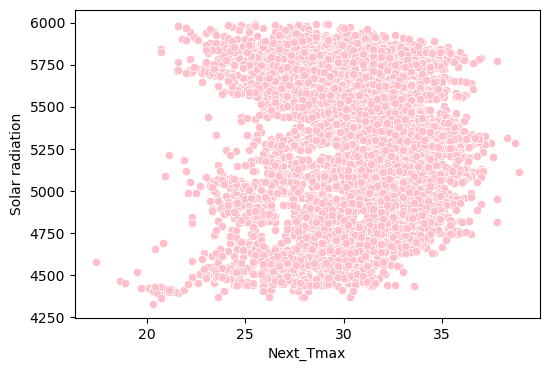

In [31]:
# Next_Tmax vs Solar radiation
plt.figure(figsize=(6,4))
sns.scatterplot(x='Next_Tmax', y='Solar radiation', data=df, color='pink')
plt.show()

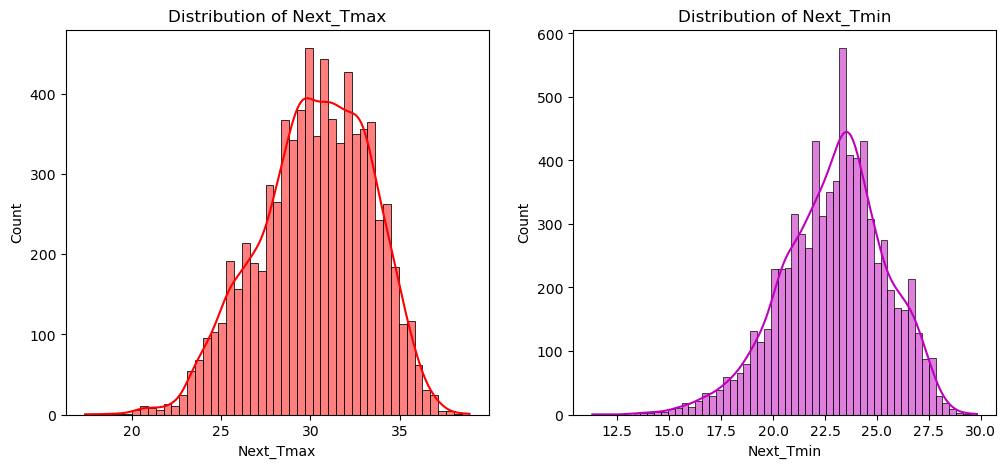

In [32]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))

# Fist plot: Distribution of Next_Tmax
plt.subplot(1,2,1)
sns.histplot(df['Next_Tmax'],kde=True,color='r')
plt.title('Distribution of Next_Tmax')

# Second plot: Distribution of Next_Tmin
plt.subplot(1,2,2)
sns.histplot(df['Next_Tmin'],kde=True,color='m')
plt.title('Distribution of Next_Tmin')

plt.show()

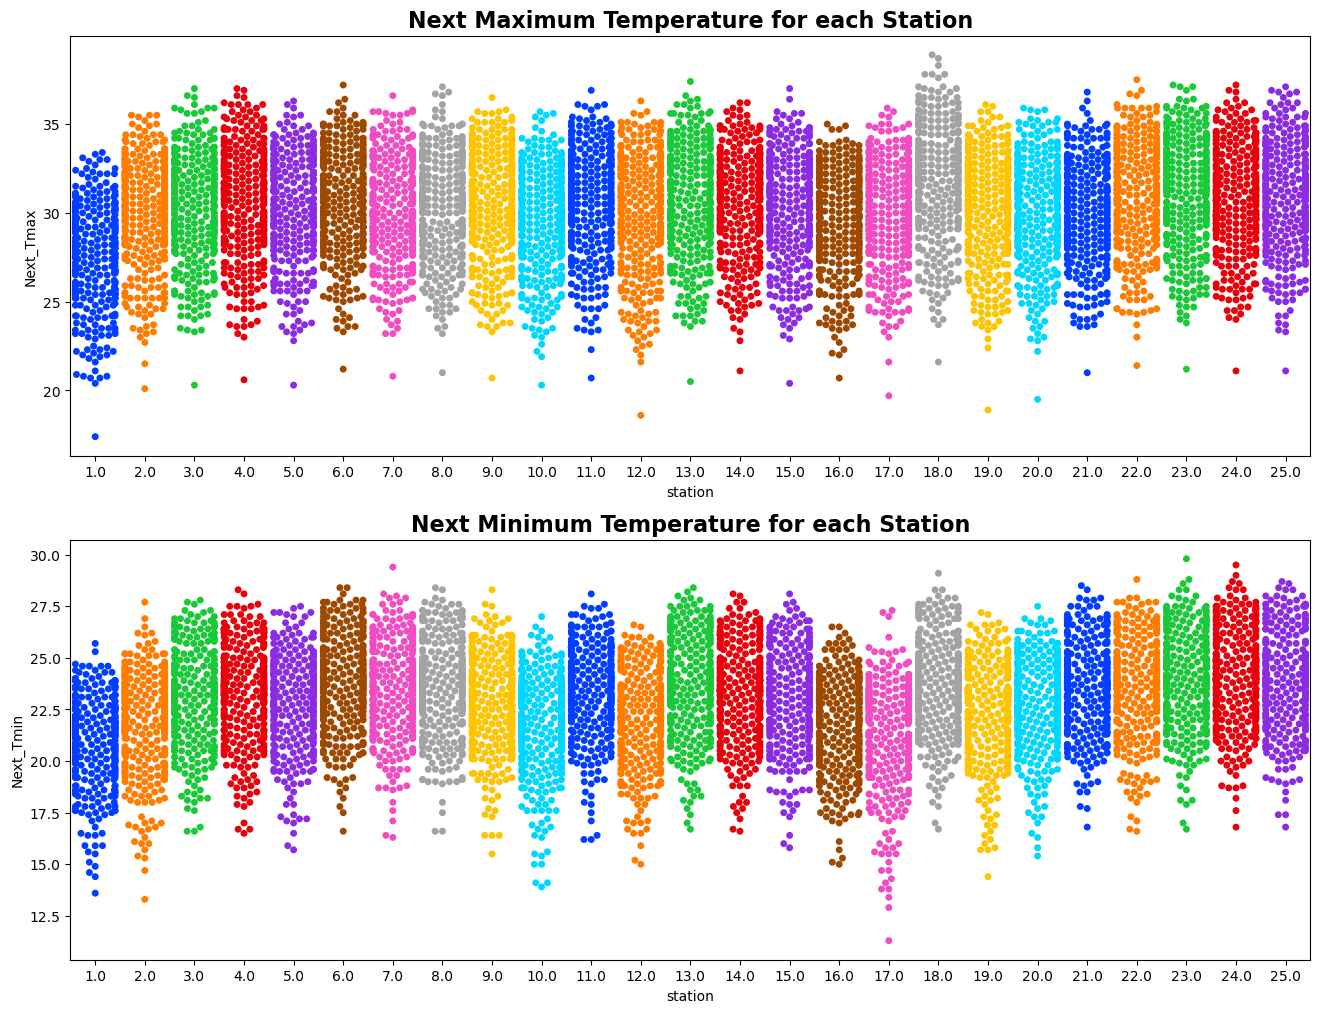

In [33]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(16,12))

#First plot: Next_Tmax for each station
plt.subplot(2,1,1)
sns.swarmplot(x='station', y='Next_Tmax', data=df, palette='bright')
plt.title('Next Maximum Temperature for each Station', fontsize=16, fontweight='bold')

# Second Plot:Next_Tmin for each station
plt.subplot(2,1,2)
sns.swarmplot(x='station', y='Next_Tmin', data=df, palette='bright')
plt.title('Next Minimum Temperature for each Station', fontsize=16, fontweight='bold')
plt.show()

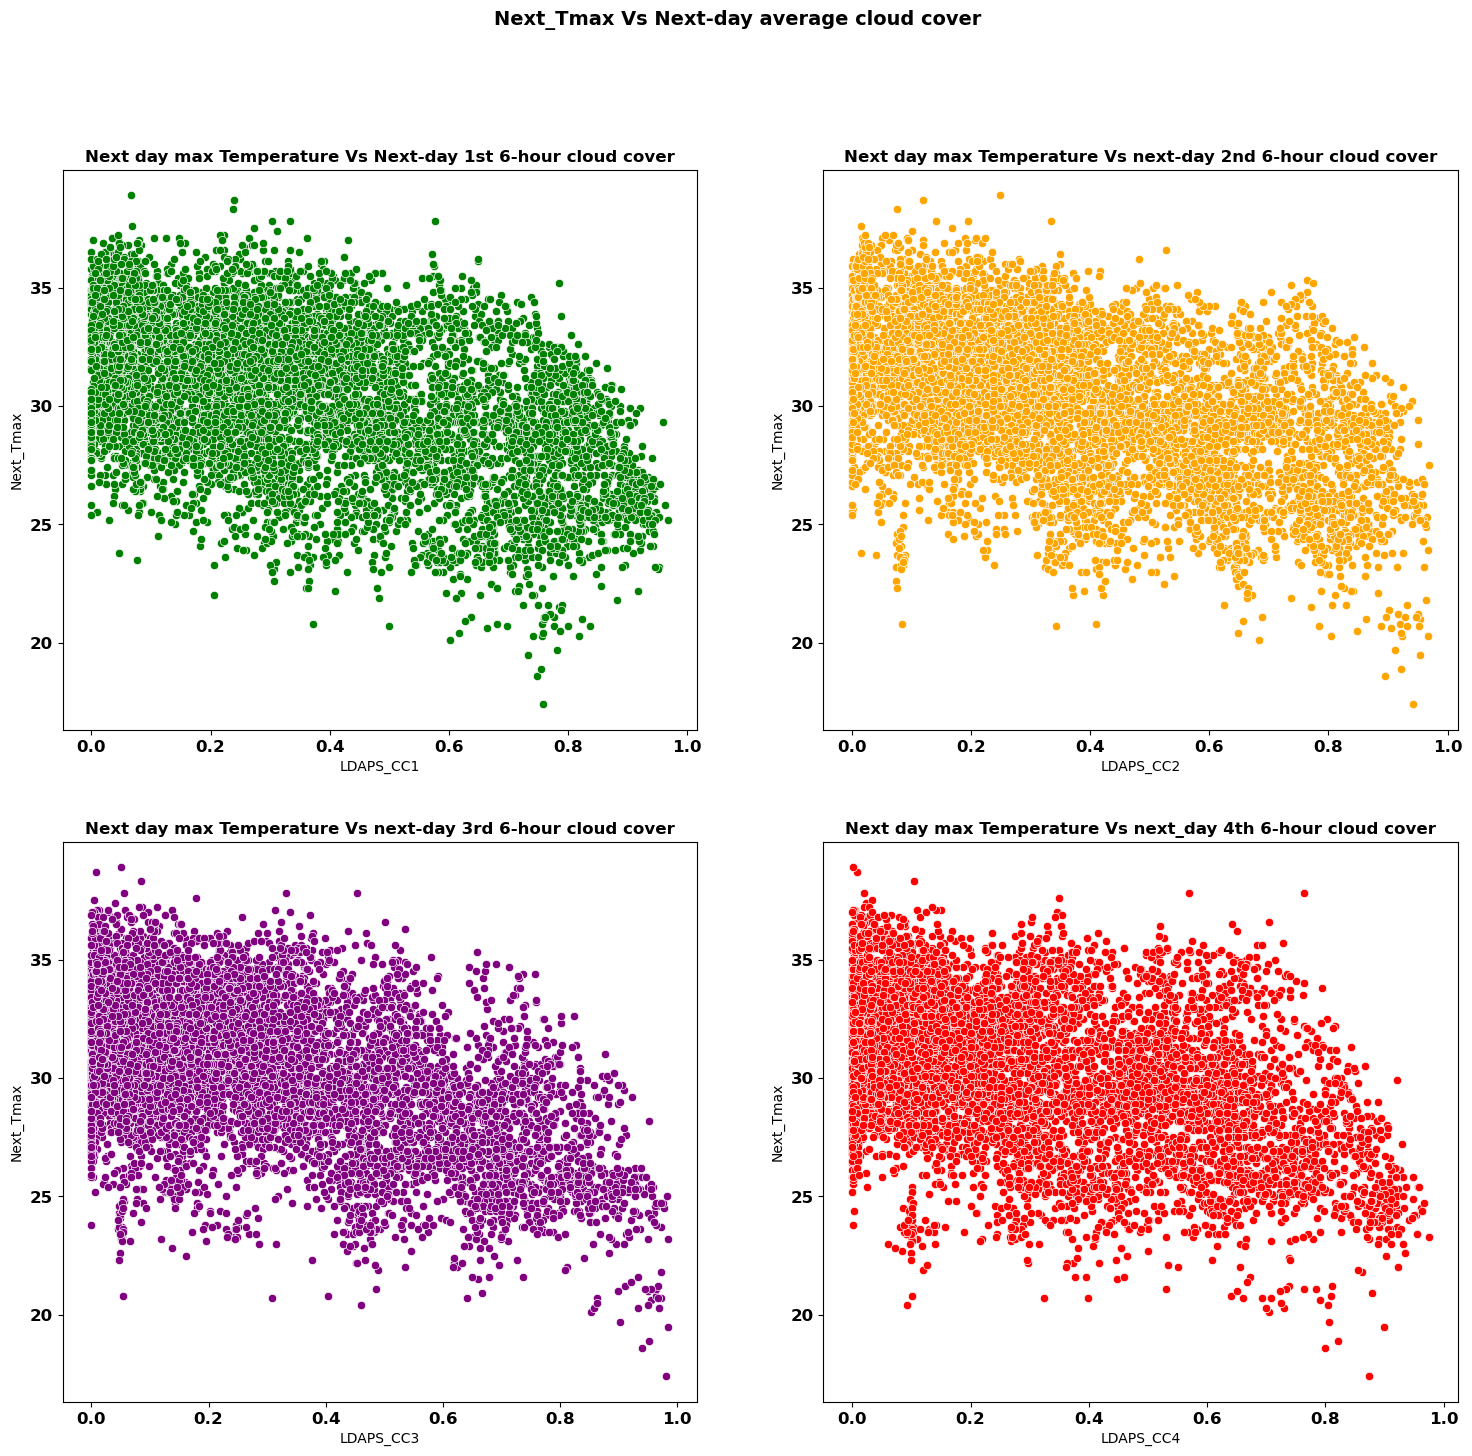

In [34]:
# Comparing Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

#First Plot: Next day max Temperature Vs Next-day 1st 6-hour cloud cover
plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=12, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Second Plot: Next day max Temperature Vs next-day 2nd 6-hour cloud cover
plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=12, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='orange')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Third Plot:Next day max Temperature Vs next-day 3rd 6-hour cloud cover
plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=12, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Fourth Plot:Next day max Temperature Vs next_day 4th 6-hour cloud cover
plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=12, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=df,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.show()

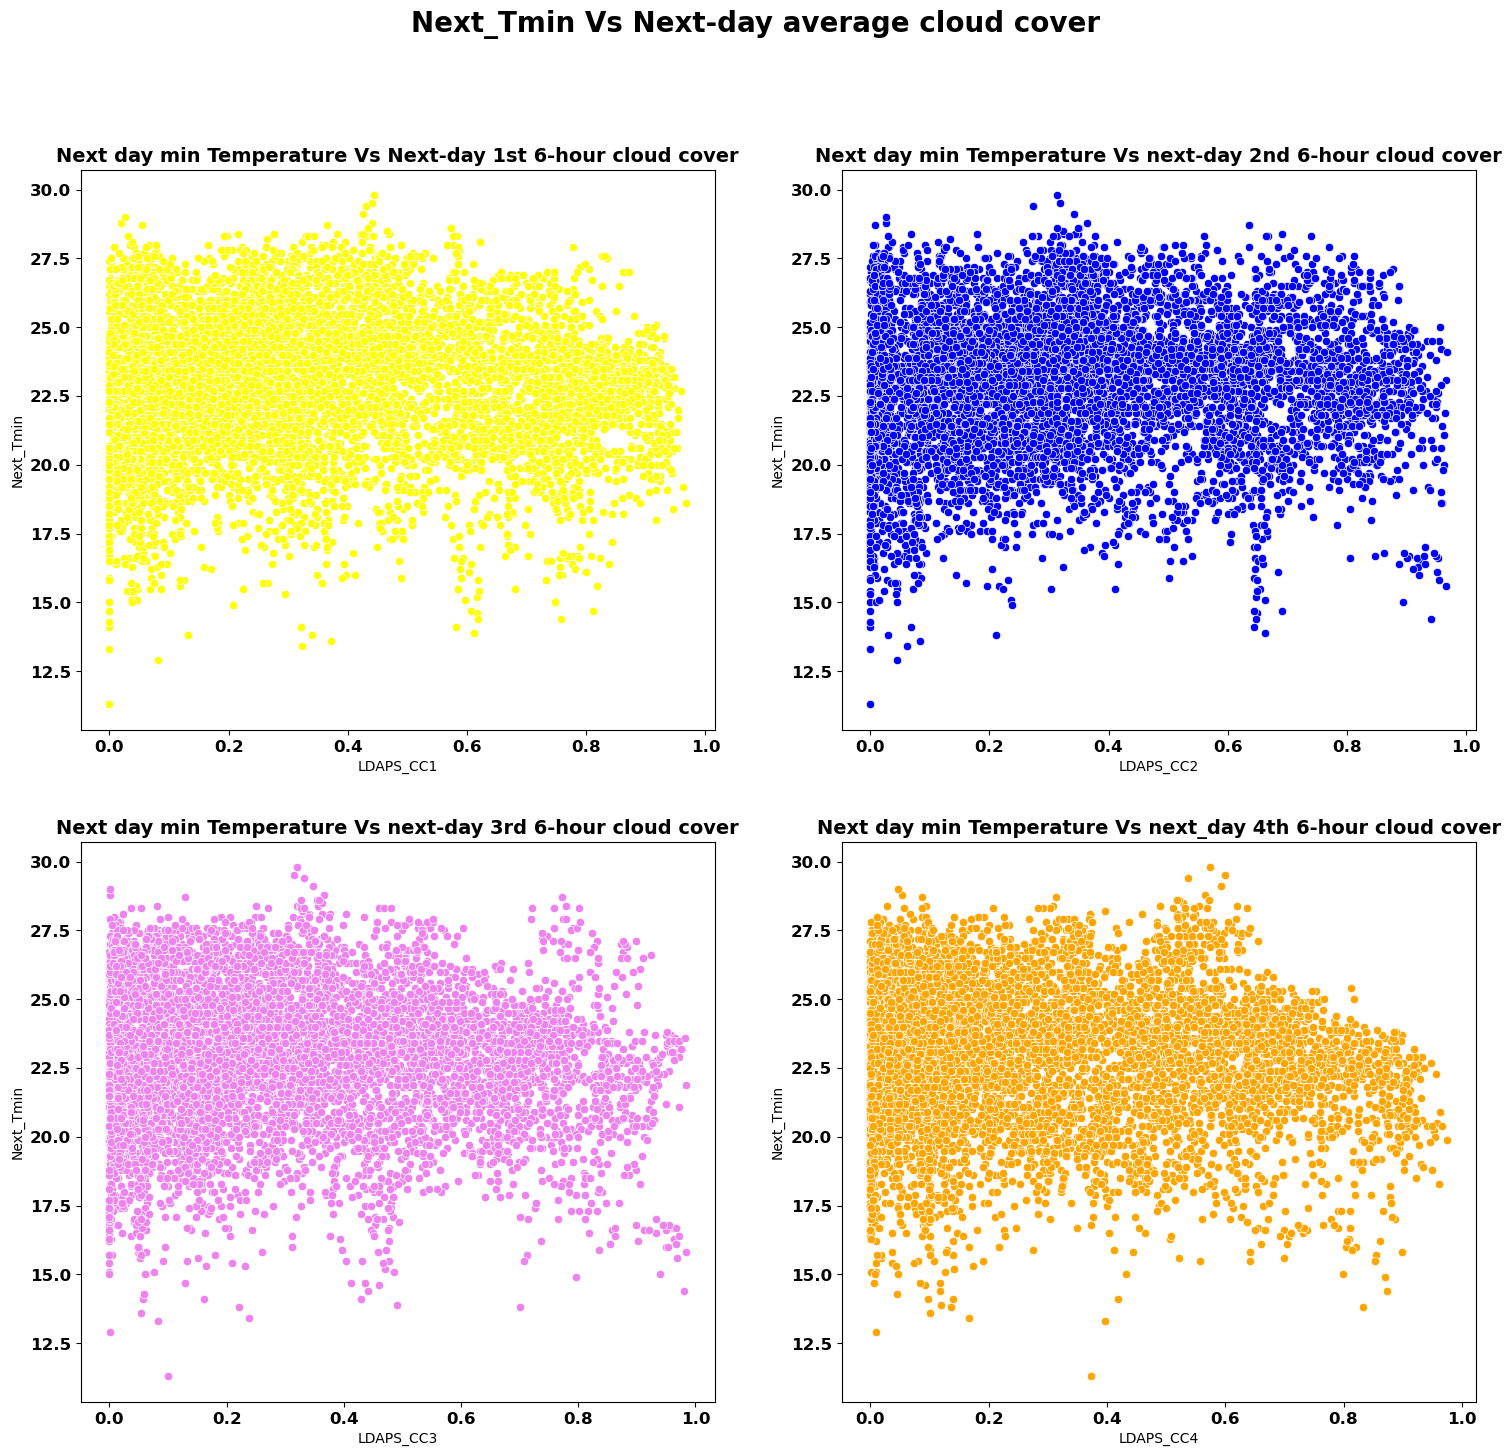

In [35]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="yellow")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()


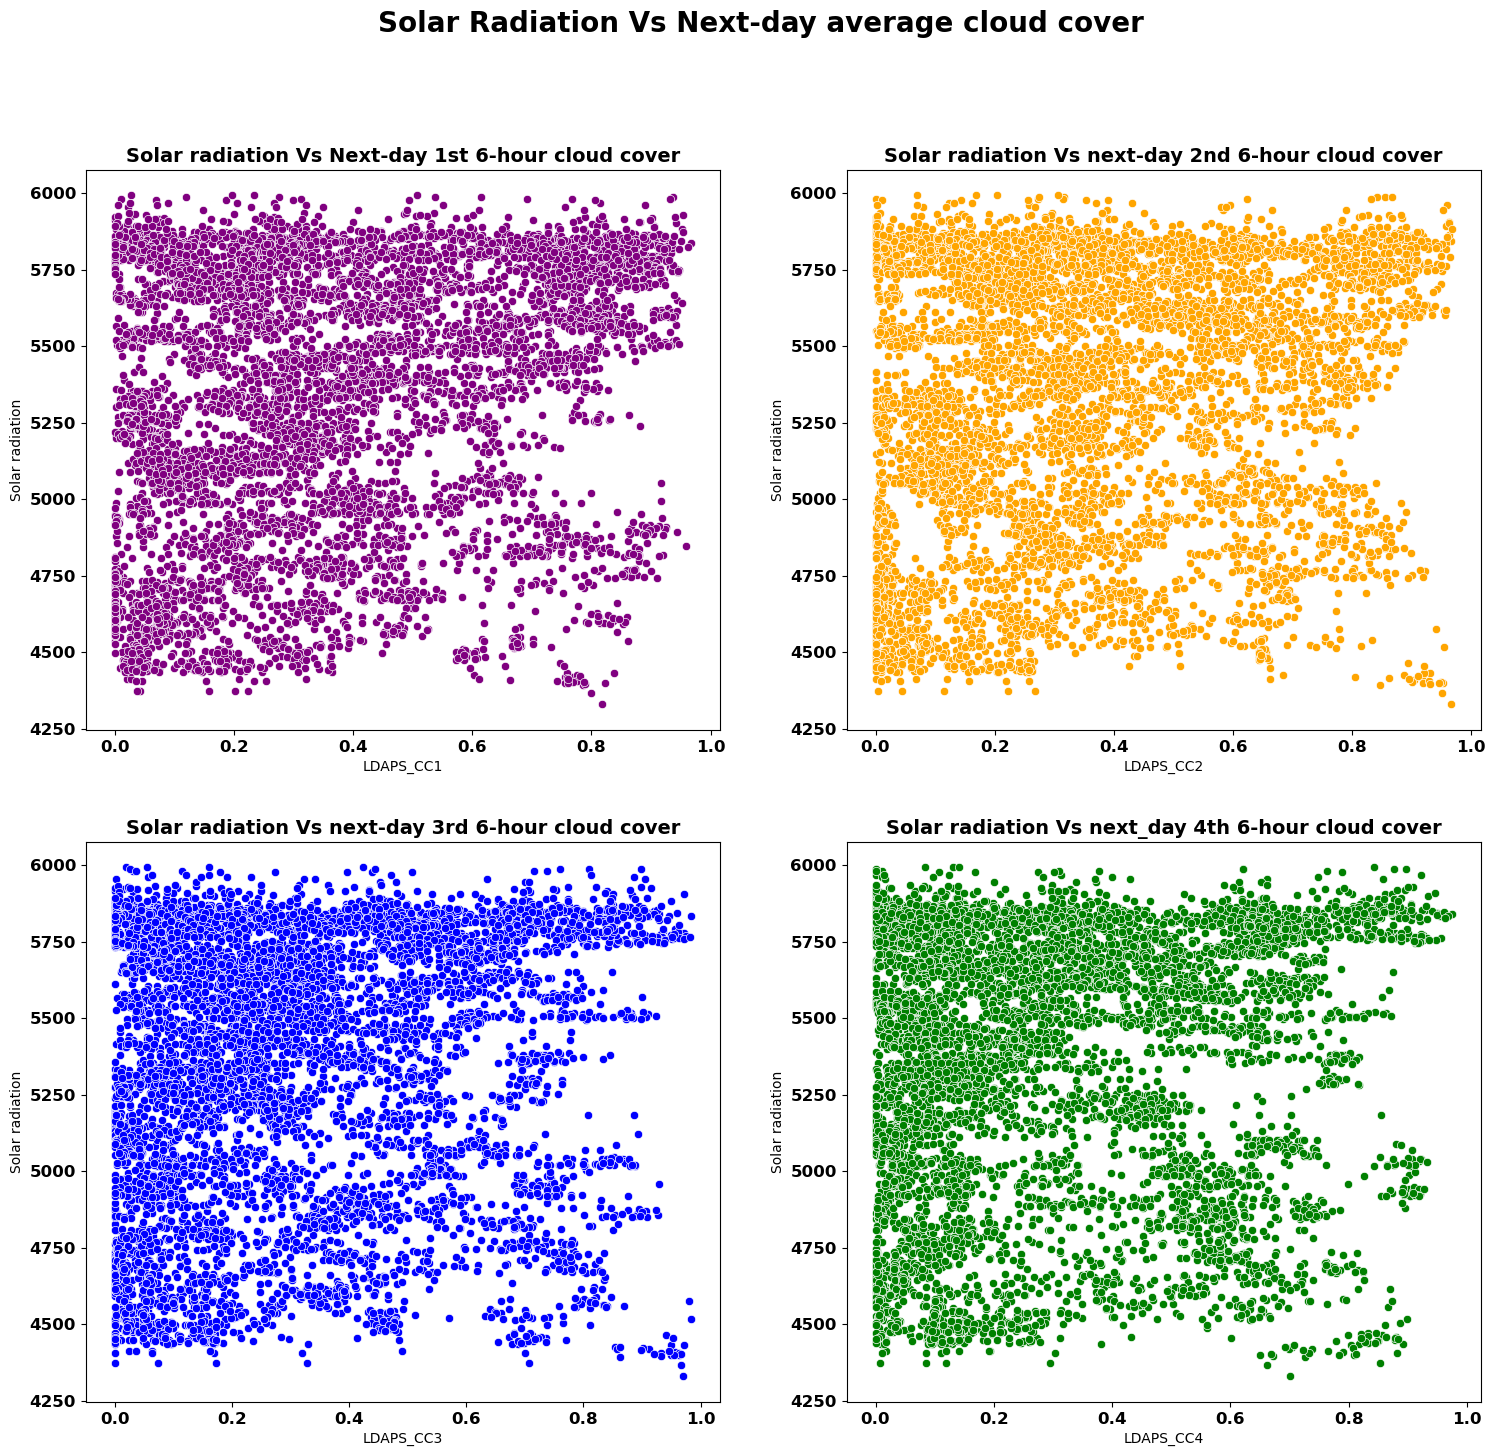

In [36]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

#First plot:
plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color="purple")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Second plot:
plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='orange')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Third plot:
plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Fourth plot:
plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.show()

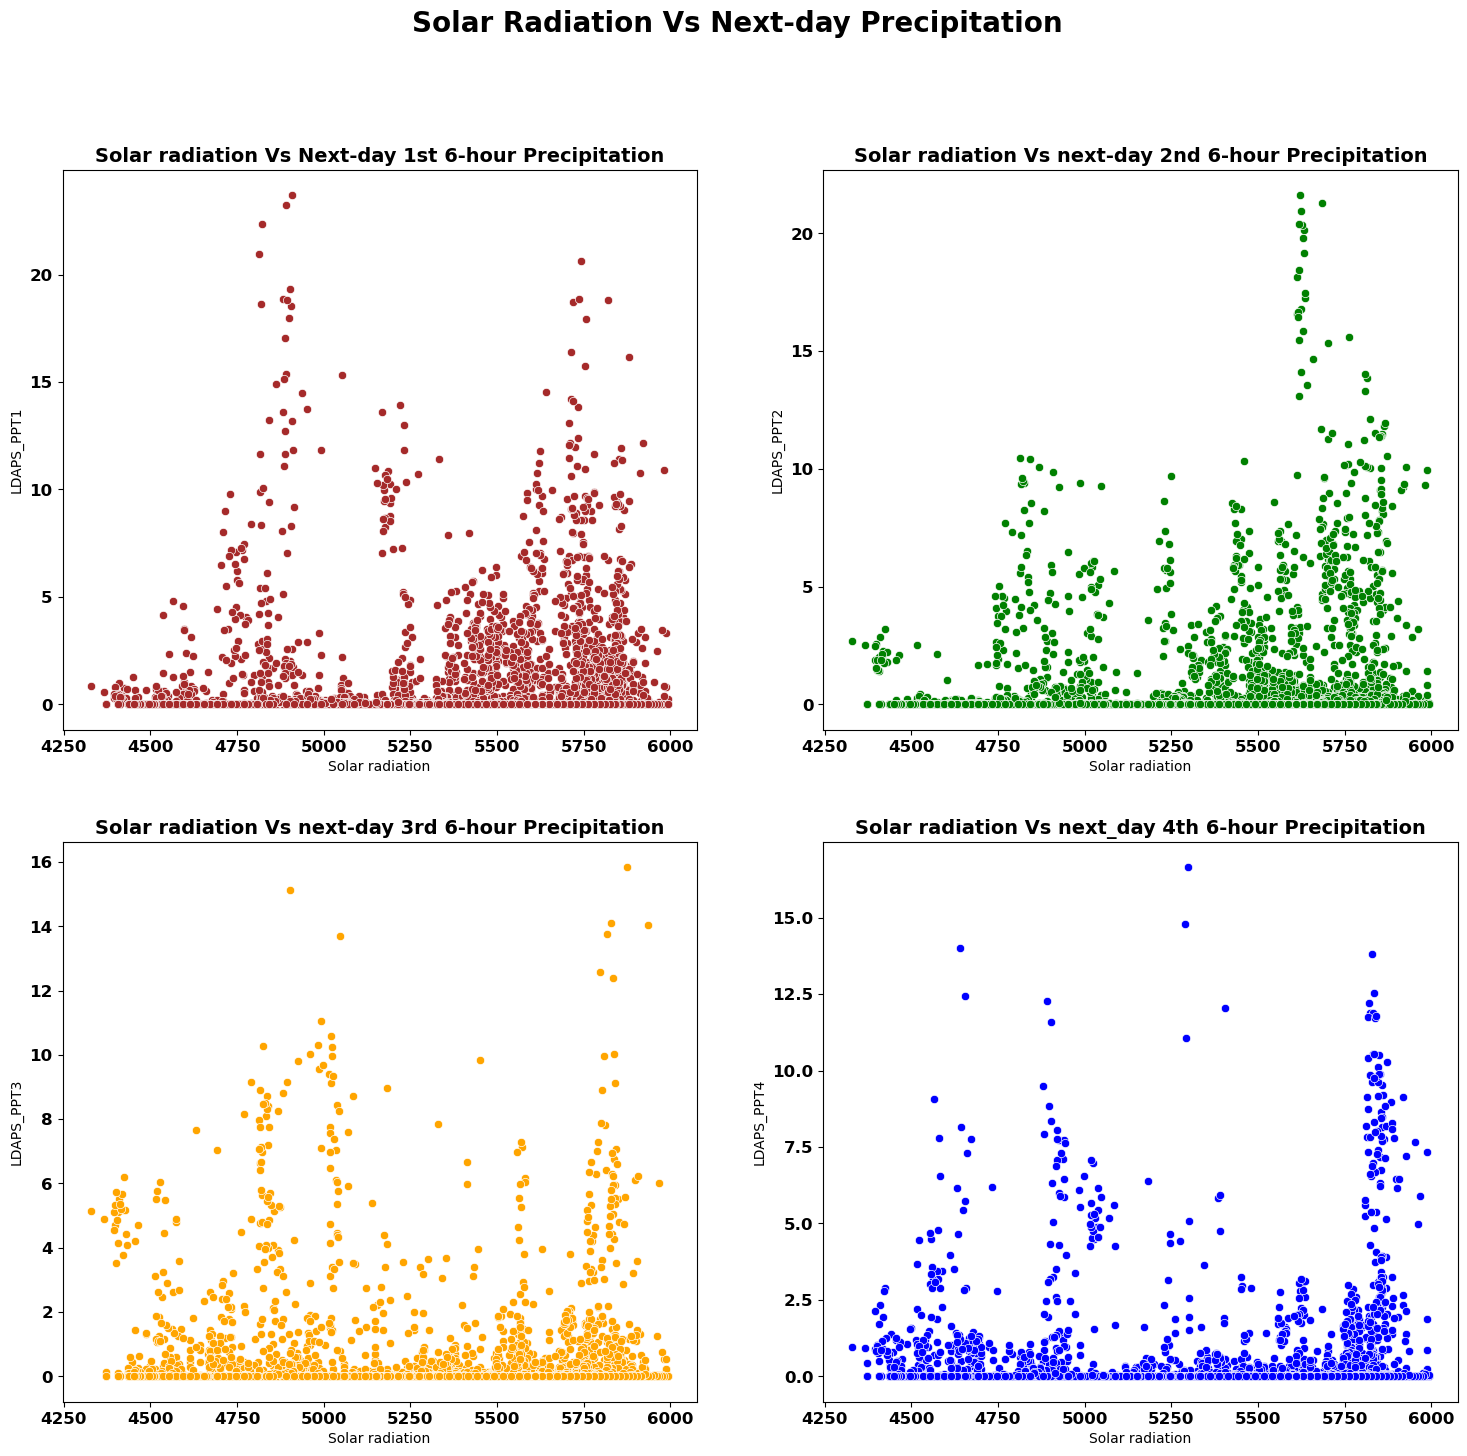

In [37]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

# First Plot
plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=df,color="brown")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Second Plot
plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=df,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Third Plot
plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=df,color='orange')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

# Fourth Plot
plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=df,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.show()

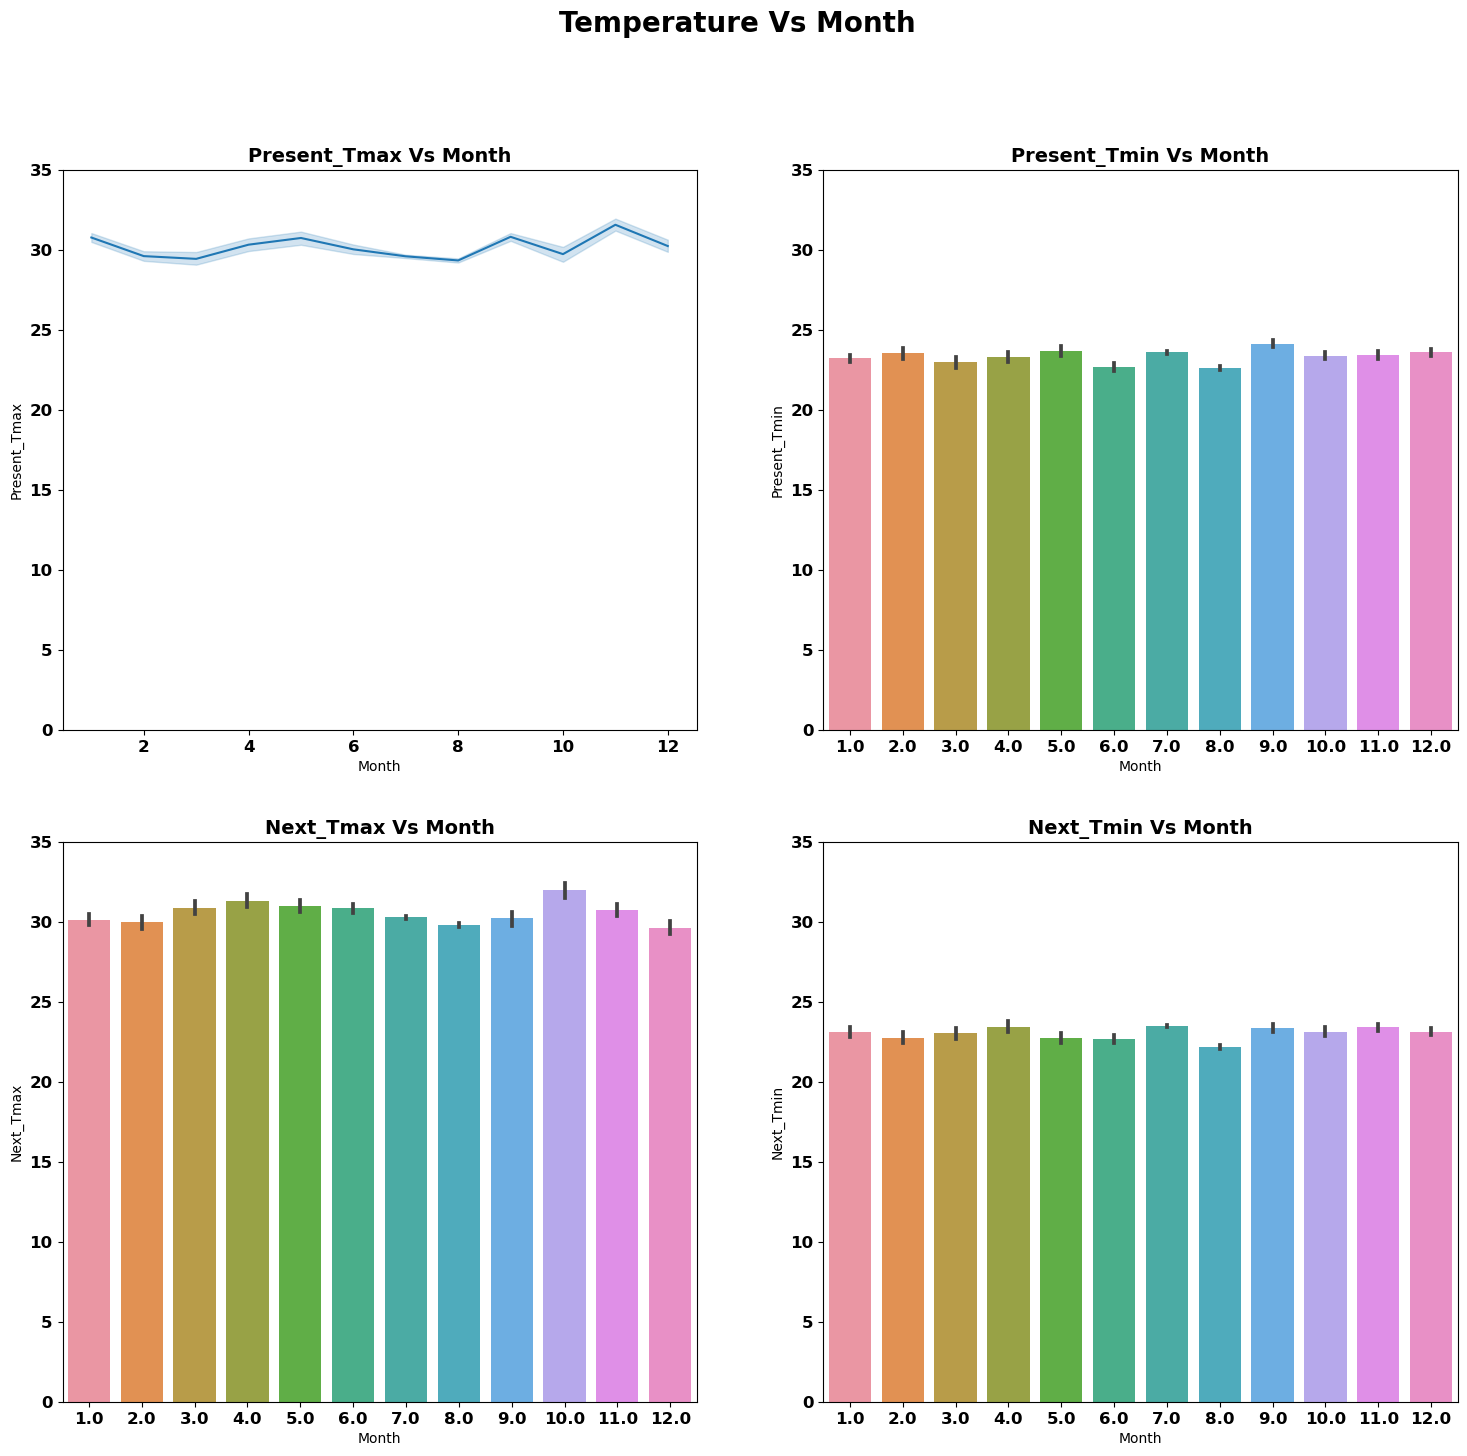

In [38]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=df)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

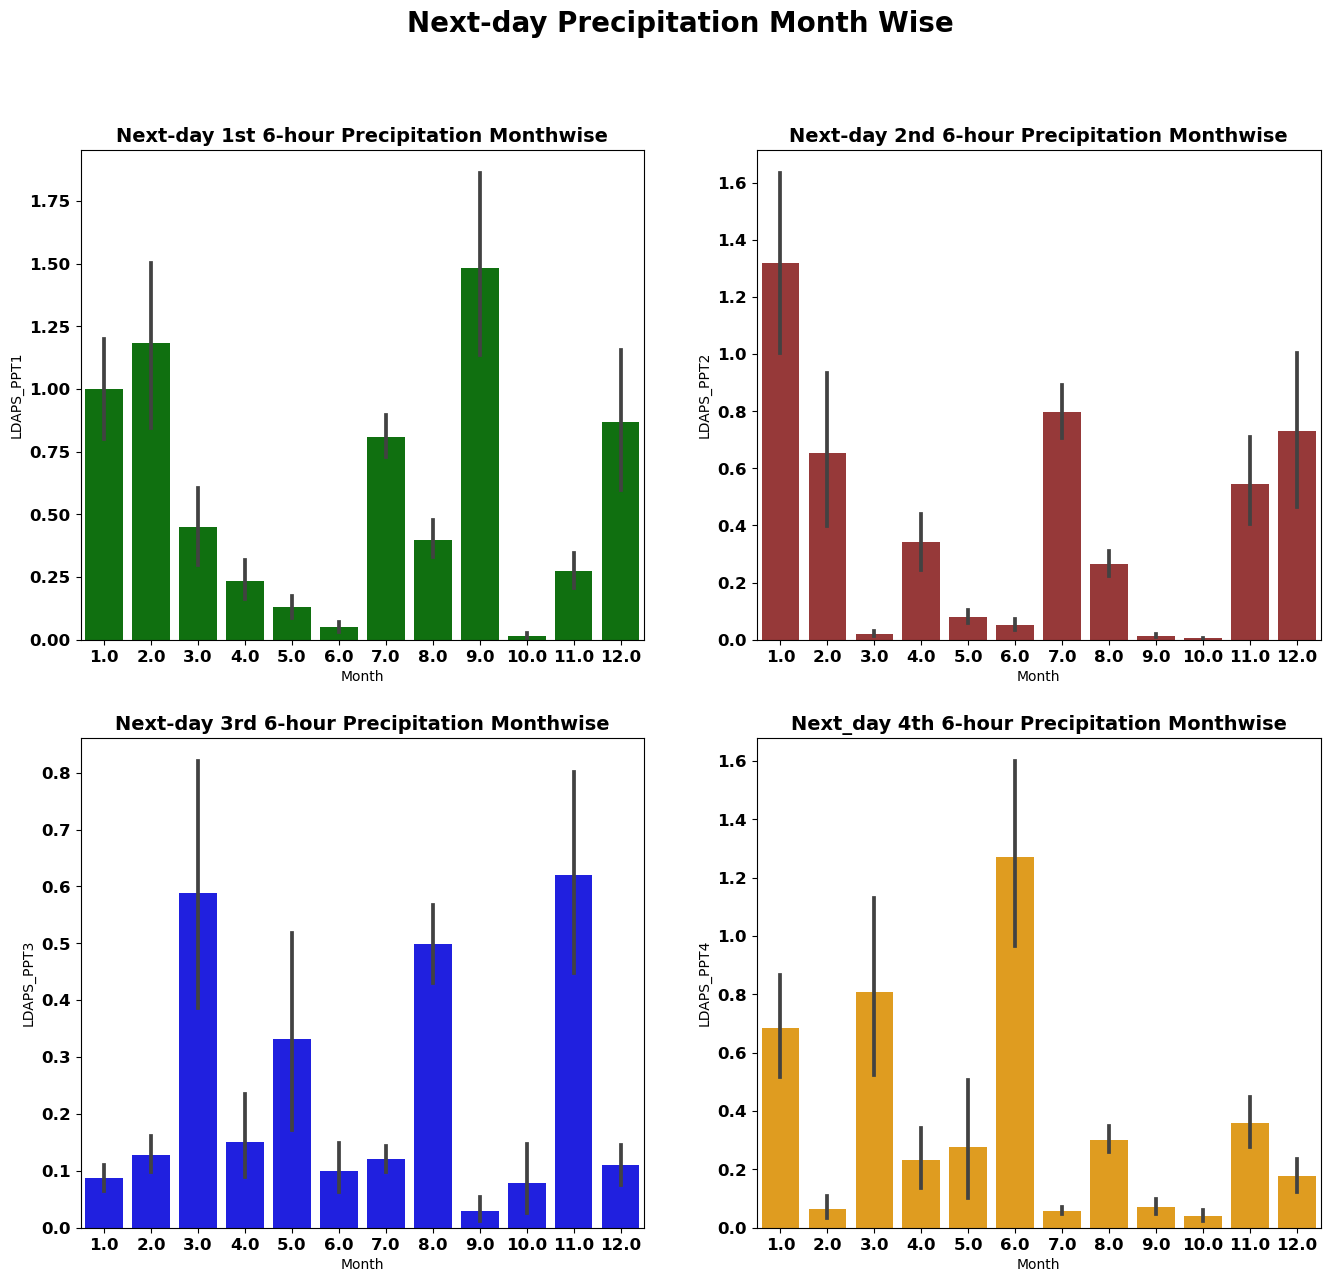

In [39]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT1'],data=df,color="green")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT2'],data=df,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT3'],data=df,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=df['Month'], y=df['LDAPS_PPT4'],data=df,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.724207856747


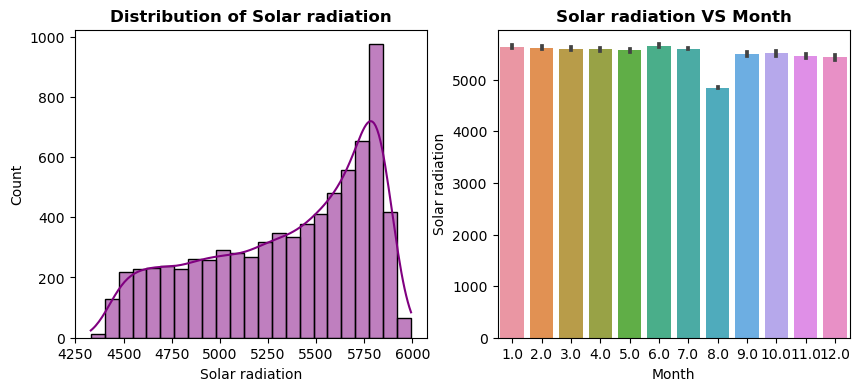

In [40]:
print('Minimum Solar radiation :',df['Solar radiation'].min())
print('Maximum Solar radiation :',df['Solar radiation'].max())
print('Average Solar radiation :',df['Solar radiation'].mean())

plt.figure(figsize=(10,4))

# First Plot: Distribution of Solar radiation
plt.subplot(1,2,1)
sns.histplot(df['Solar radiation'],kde=True,color='purple')
plt.title('Distribution of Solar radiation',fontsize=12, fontweight='bold')

#Second Plot: Coparision of Solar radiation Vs Month
sns.set_palette('husl')
plt.subplot(1,2,2)
sns.barplot(y=df['Solar radiation'], x=df['Month'])
plt.title('Solar radiation VS Month',fontsize=12, fontweight='bold')
plt.show()

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.0940966991598575 m/s


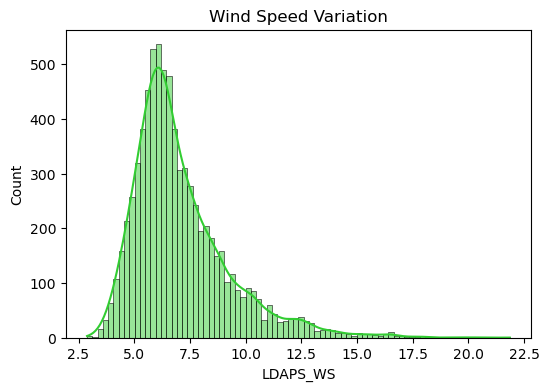

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(df['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',df['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',df['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',df['LDAPS_WS'].mean(),'m/s')

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


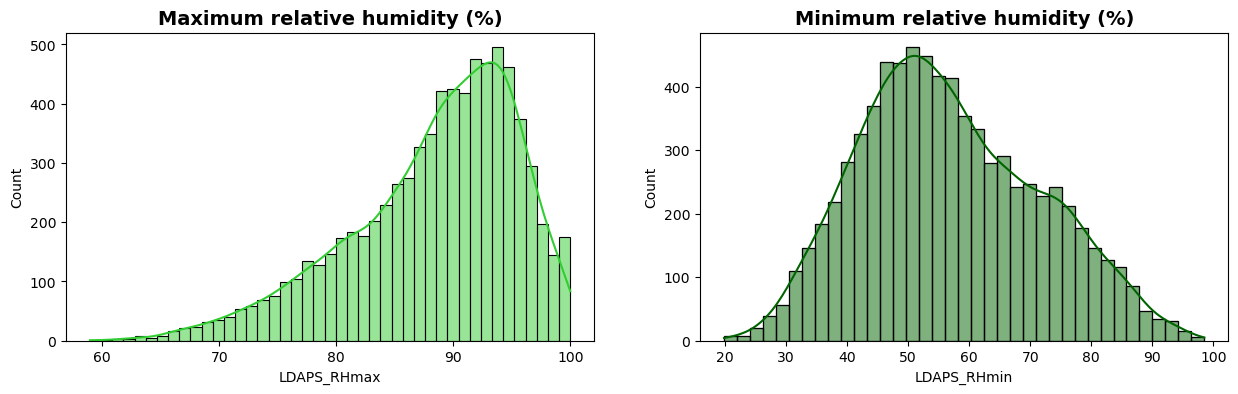

In [42]:
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

#Visualizing it
plt.figure(figsize=(15,4))

#First Plot:
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color='limegreen')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')

# Second Plot:
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmin'],kde=True,color='darkgreen')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')

plt.show()

Minimum Tmax applied lapse rate is 17.62495378 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 14.27264631 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


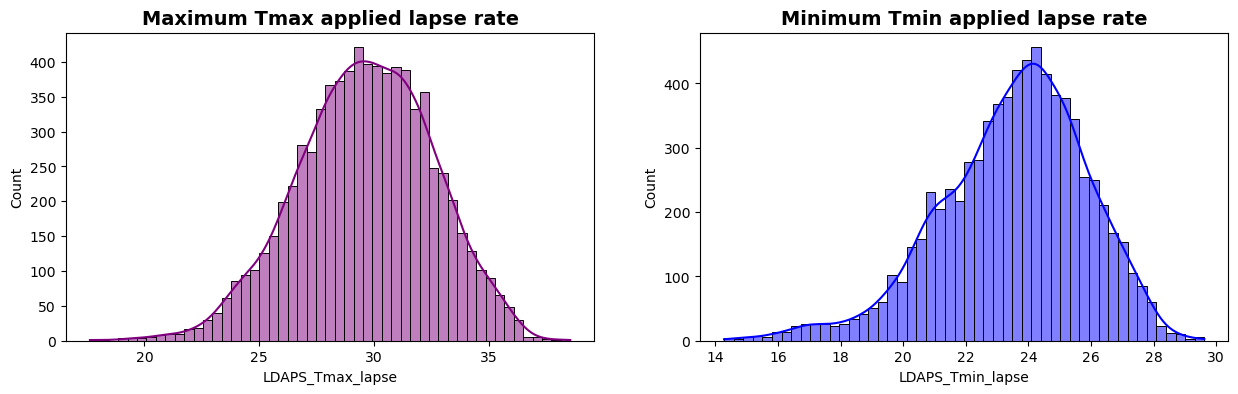

In [43]:
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'
      .format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'
      .format(df['LDAPS_Tmin_lapse'].min(),df['LDAPS_Tmin_lapse'].max()))


# Visualizing it
plt.figure(figsize=(15,4))

# First Plot:
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')

# Second Plot:
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmin_lapse'],kde=True,color='blue')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')

plt.show()

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988


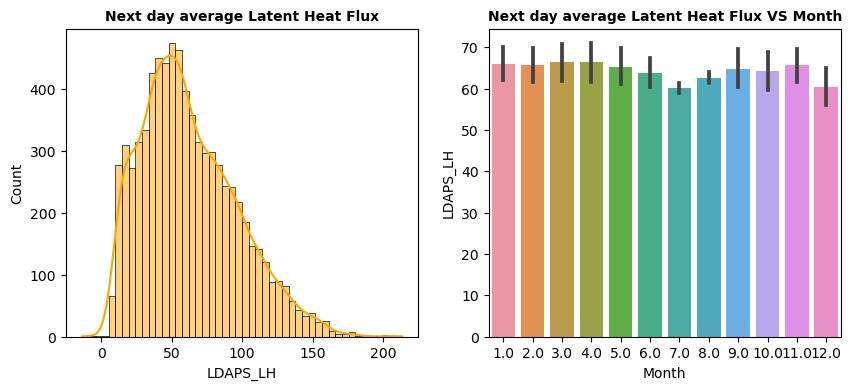

In [44]:
print('Minimum Latent Heat Flux :',df['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',df['LDAPS_LH'].max())
print('Average Latent Heat Flux :',df['LDAPS_LH'].mean())

# Visualizing it
plt.figure(figsize=(10,4))

# First Plot:
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_LH'],kde=True,color='orange')
plt.title('Next day average Latent Heat Flux',fontsize=10, fontweight='bold')

# second plot:
plt.subplot(1,2,2)
sns.barplot(y=df['LDAPS_LH'], x=df['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=10, fontweight='bold')

plt.show()

In [45]:
# Initiating Label Encoder
le=LabelEncoder()

# Columns need to be encoded
df['State'] = le.fit_transform(df['State'])
df['City'] = le.fit_transform(df['City'])

df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688    91.116364   
1      2.0          31.9          21.6    52.263397    90.604721   
2      3.0          31.6          23.3    48.690479    83.973587   
3      4.0          32.0          23.4    58.239788    96.483688   
4      5.0          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin   Day  Month    Year  State  City  
0       21.2  30.0    6.0  2013.0      1     6  
1       22.5  30.0    6.0  2013.0      1     6  
2       23.9  30.0    6.0  2013.0      1     6  
3       24.3  30.0    6.0  2013.0      1     6  
4       22.5  30.0    6.0  2013.0      0     3

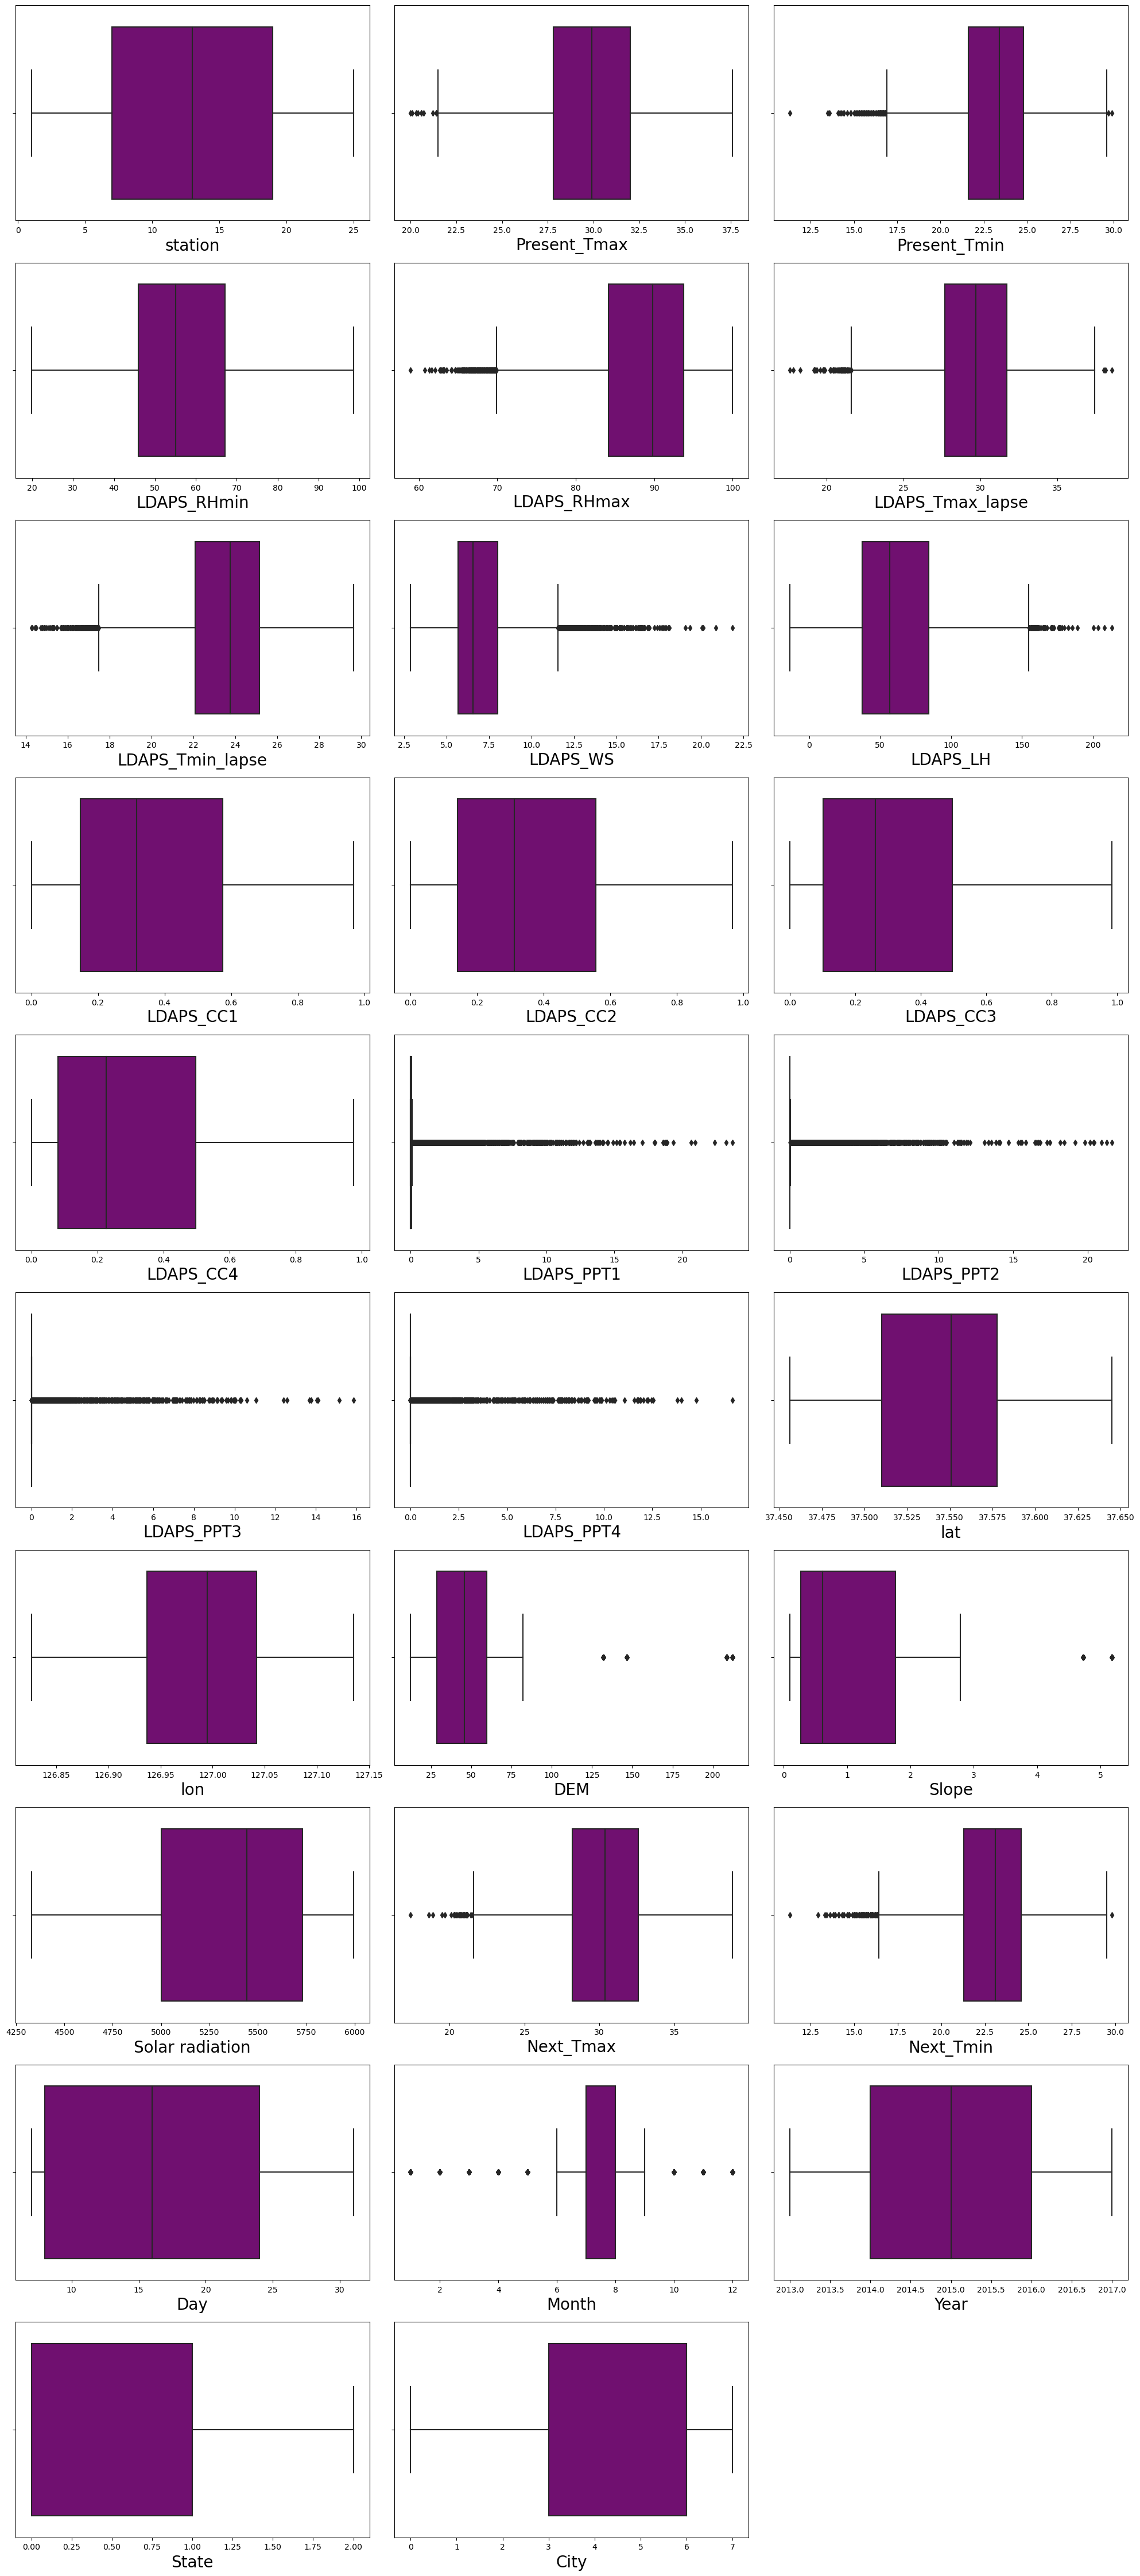

In [46]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(x=df[column],color='purple')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [47]:
# Removing outlier using Zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal:  11.188719030047443


In [48]:
df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

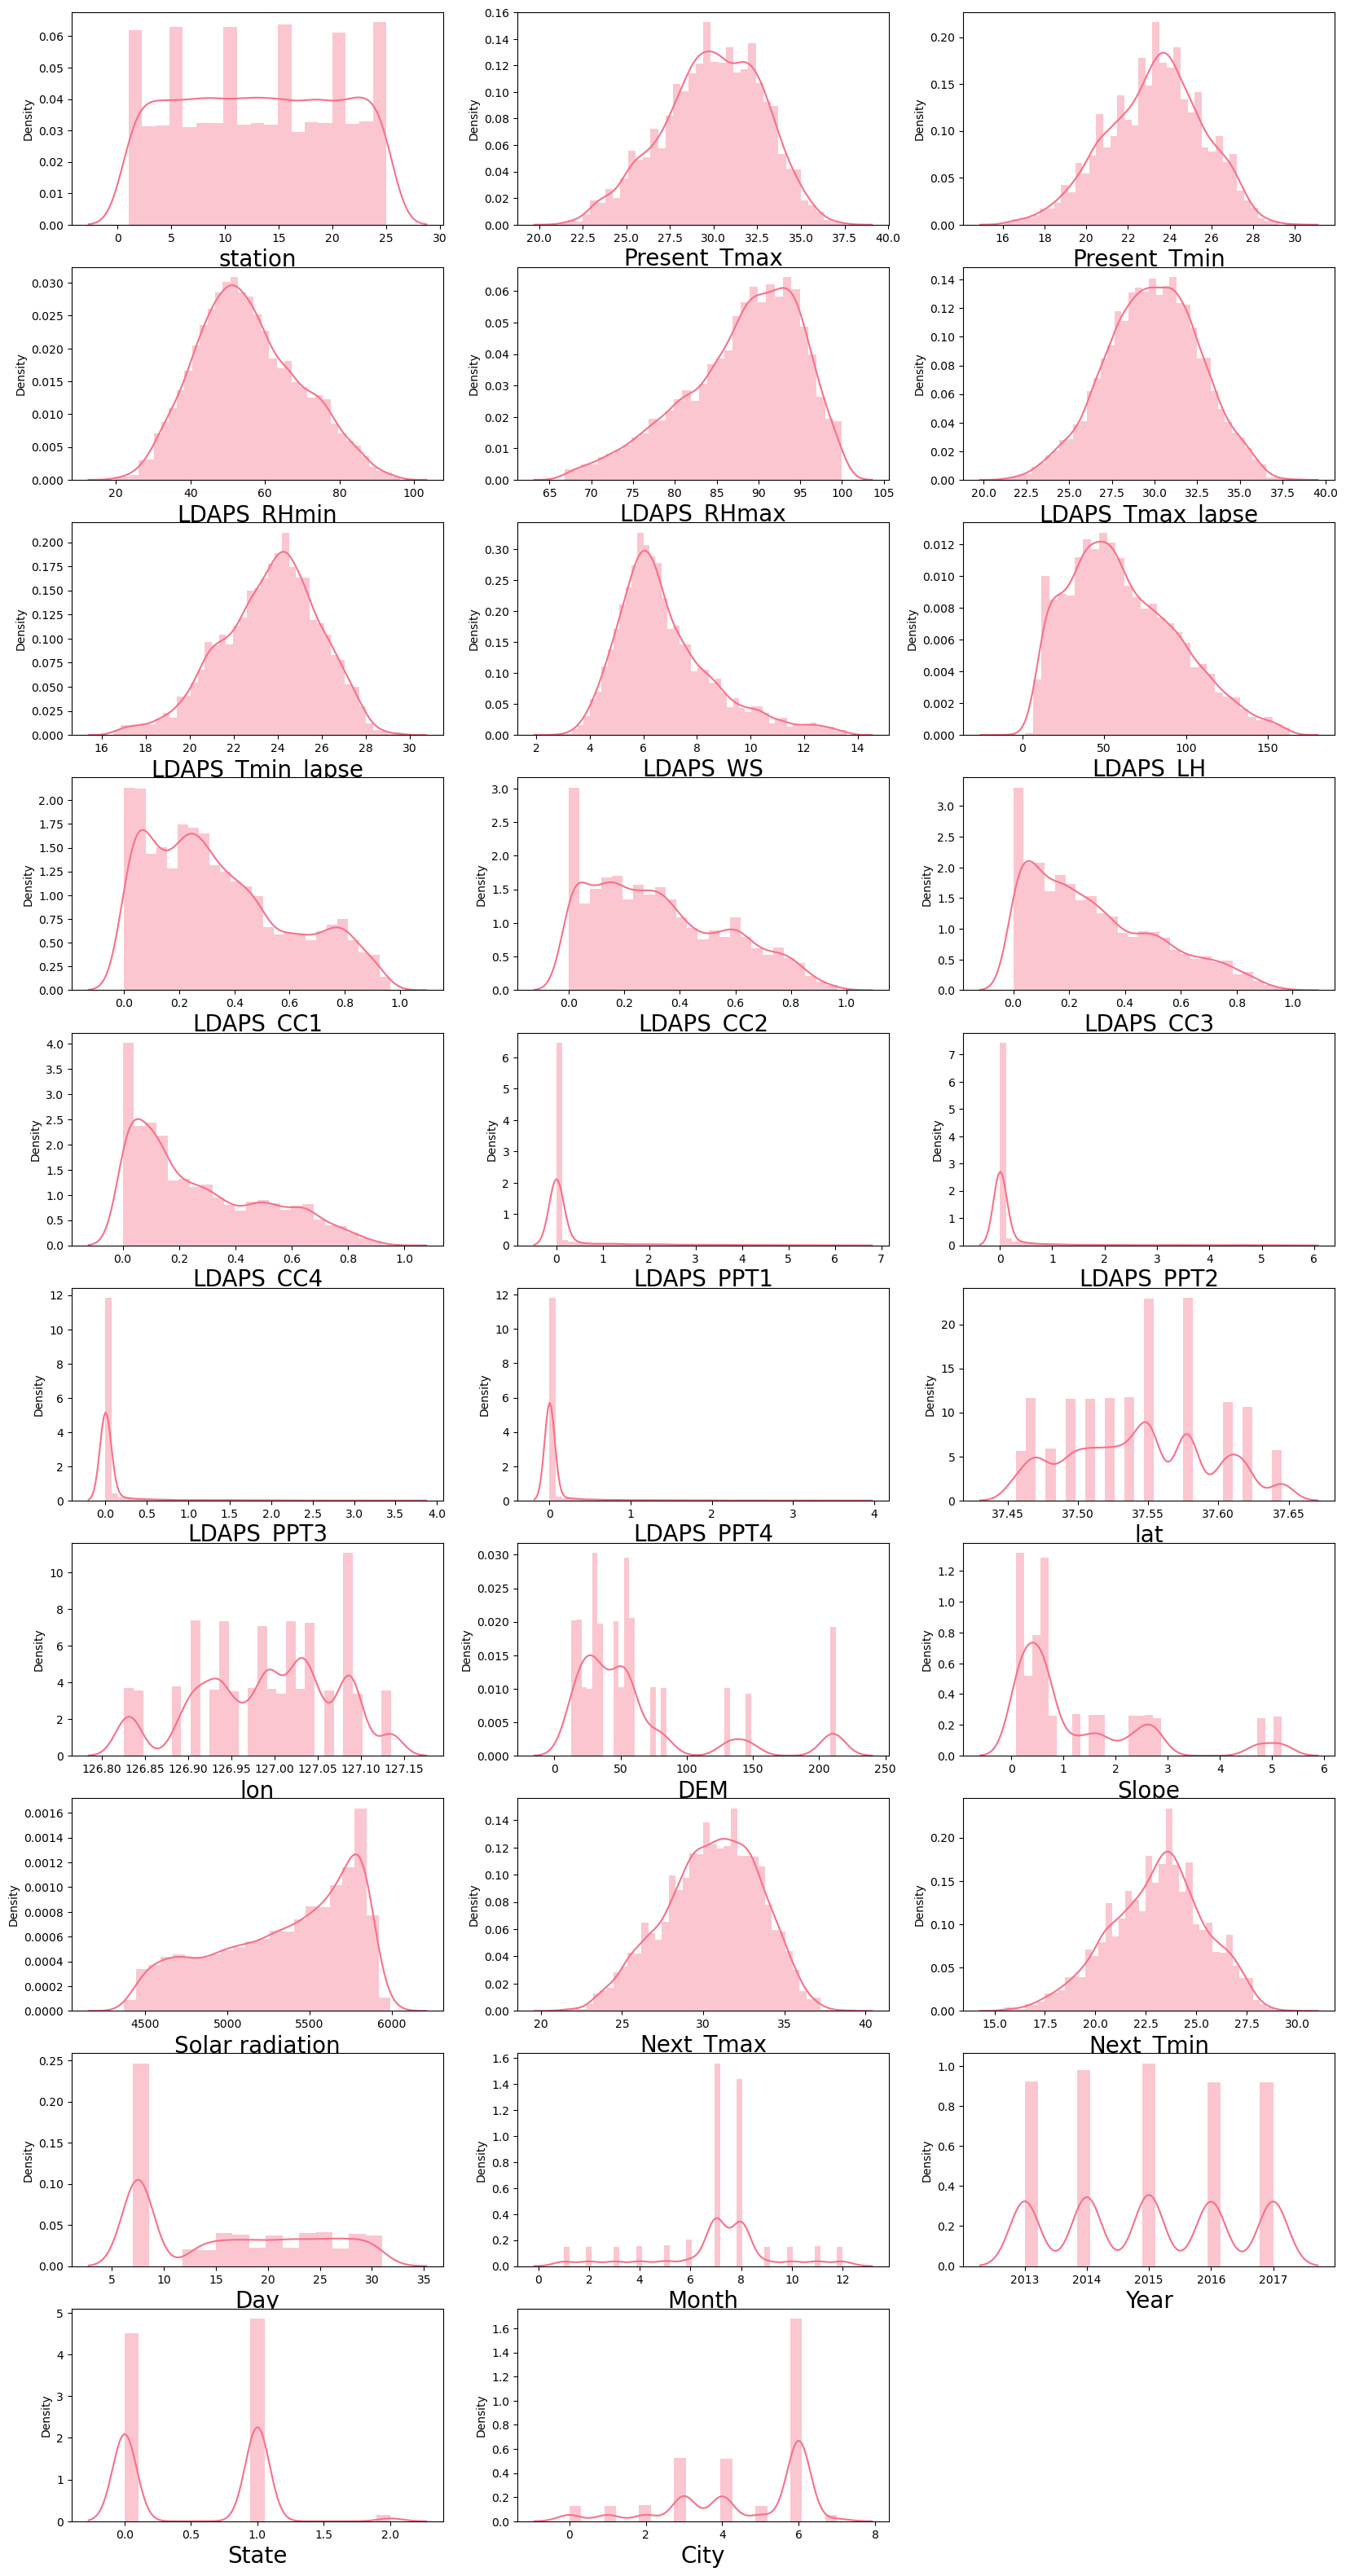

In [49]:
plt.figure(figsize=(20,40),facecolor='white')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [50]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

In [51]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Iniating Scaler
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [52]:
#Correlation of all the features
df_cor=df.corr()
df_cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005179     -0.136914     -0.076877    -0.070194   
Month             0.003494      0.039443     -0.019387    -0.070498   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.20

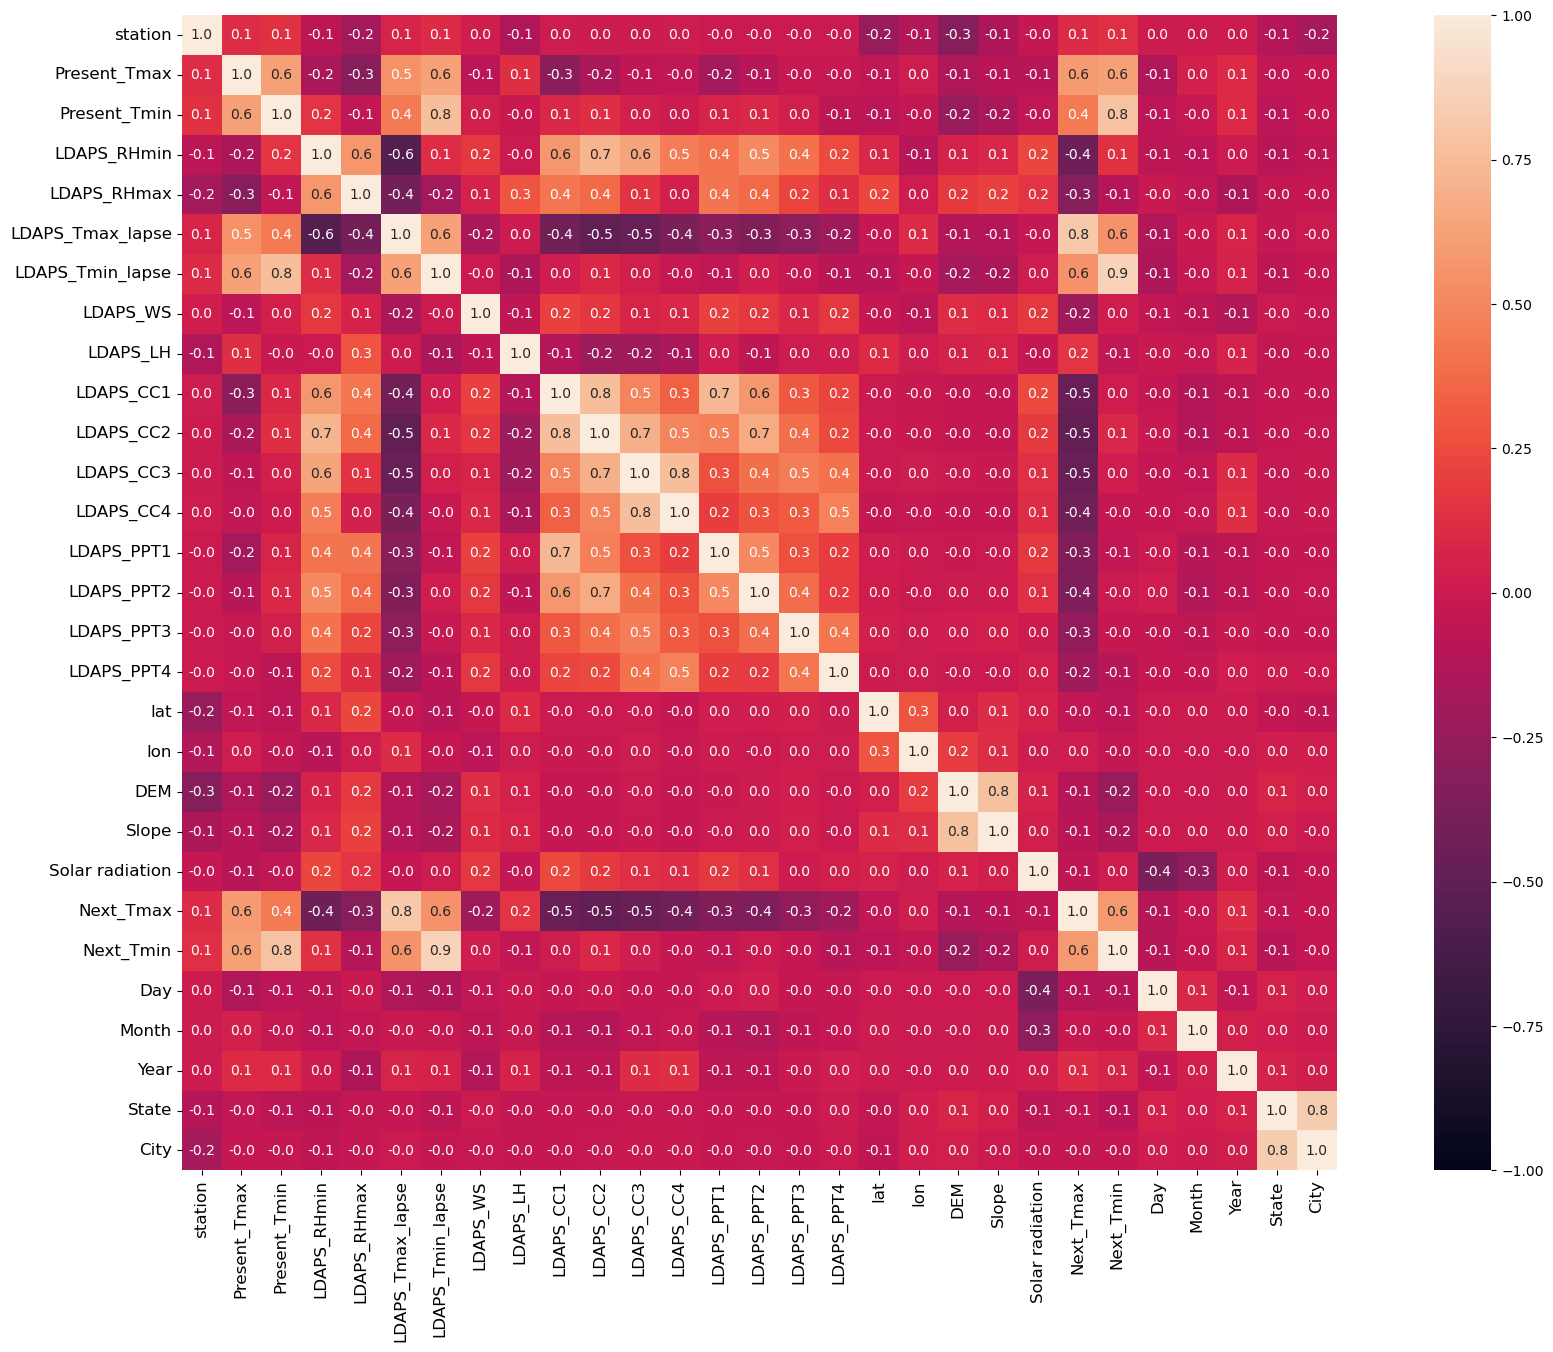

In [53]:
#visualizing it
plt.figure(figsize=(25,15))
sns.heatmap(df_cor, vmin=-1, vmax=1, annot=True, square=True, fmt='0.1f', 
            annot_kws={'size':10}, cmap="rocket")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [54]:
# Copied our Dataframe
df1 = df.copy()

In [55]:
#correlation with target column
correlation_with_target = df.corr()['Next_Tmax'].abs().sort_values(ascending=False)
print(correlation_with_target)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.816861
Present_Tmax        0.586943
Next_Tmin           0.580951
LDAPS_Tmin_lapse    0.550810
LDAPS_CC2           0.484796
LDAPS_CC3           0.464998
LDAPS_CC1           0.453763
Present_Tmin        0.438813
LDAPS_RHmin         0.433872
LDAPS_CC4           0.415827
LDAPS_PPT2          0.357330
LDAPS_PPT1          0.347241
LDAPS_RHmax         0.323446
LDAPS_PPT3          0.268024
LDAPS_PPT4          0.217651
LDAPS_WS            0.205979
LDAPS_LH            0.151784
DEM                 0.117146
station             0.106378
Day                 0.105005
Year                0.101615
Slope               0.084174
Solar radiation     0.061064
State               0.054571
lat                 0.048616
City                0.025503
Month               0.016328
lon                 0.010567
Name: Next_Tmax, dtype: float64


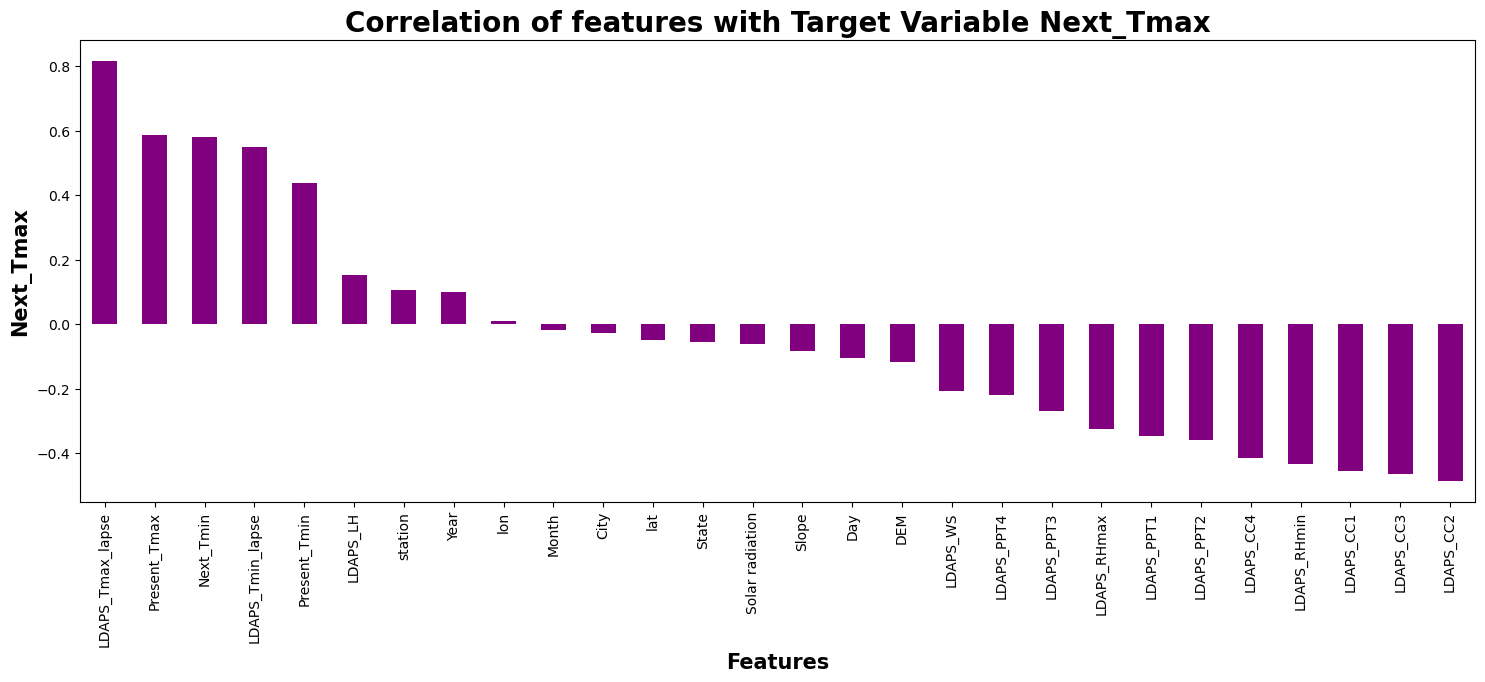

In [56]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

In [57]:
correlation_with_target = df1.corr()['Next_Tmin'].abs().sort_values(ascending=False)
print(correlation_with_target)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.873678
Present_Tmin        0.785946
Present_Tmax        0.615950
Next_Tmax           0.580951
LDAPS_Tmax_lapse    0.553227
DEM                 0.238249
Slope               0.158030
LDAPS_RHmin         0.134518
station             0.129110
LDAPS_RHmax         0.110402
LDAPS_PPT4          0.100787
Day                 0.099202
State               0.091937
LDAPS_CC2           0.078871
lat                 0.076705
Year                0.069291
LDAPS_PPT1          0.053093
LDAPS_LH            0.052365
lon                 0.041574
City                0.038001
LDAPS_PPT3          0.029908
Month               0.029336
LDAPS_CC4           0.026091
LDAPS_WS            0.023330
LDAPS_CC3           0.021743
Solar radiation     0.012532
LDAPS_CC1           0.008400
LDAPS_PPT2          0.006710
Name: Next_Tmin, dtype: float64


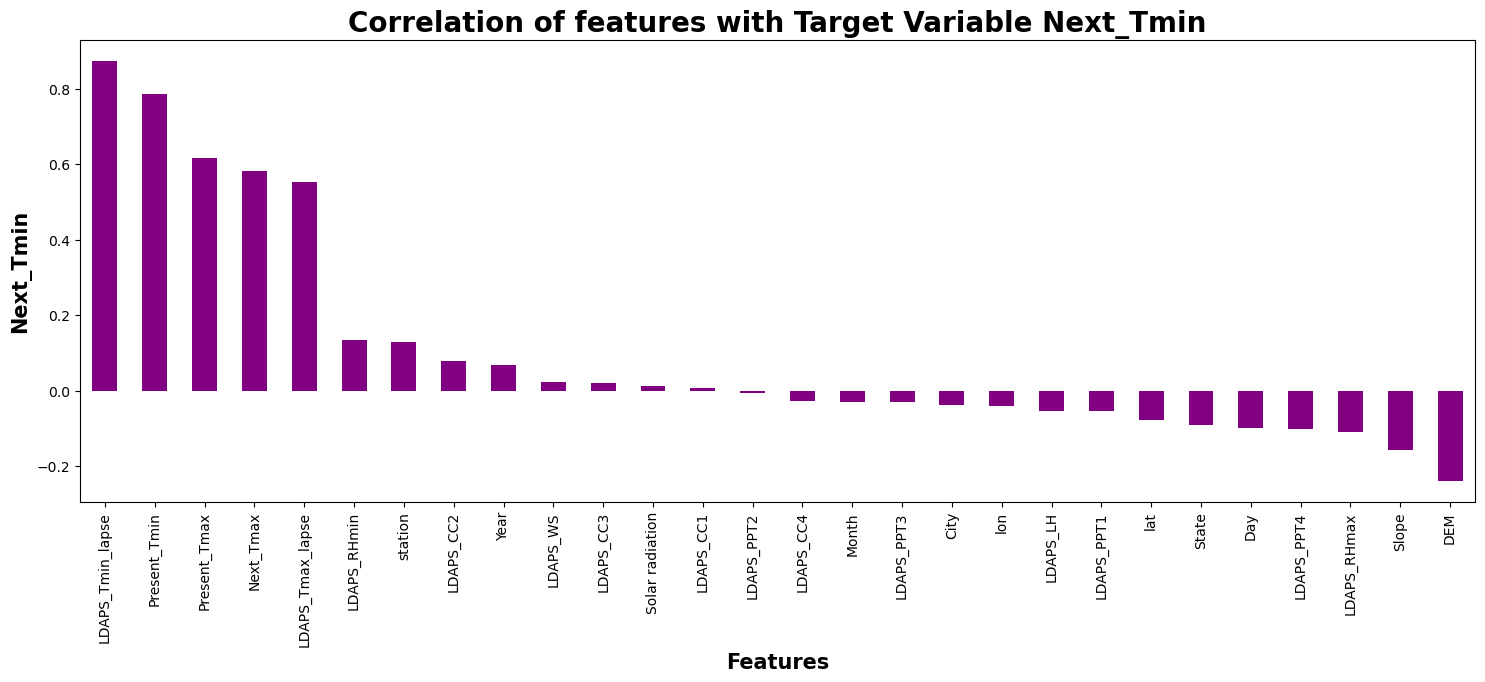

In [58]:
plt.figure(figsize = (18,6))
df1.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

In [59]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [60]:
X.shape, Y.shape

((6739, 28), (6739,))

In [61]:
# Splitting data in target and dependent feature
X1 = df1.drop(['Next_Tmin'], axis =1)
Y1 = df1['Next_Tmin']


In [62]:
X1.shape, Y1.shape

((6739, 28), (6739,))

In [63]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X_scale = scaler.fit_transform(X)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df = pd.DataFrame(X_scale, columns=X.columns)
scaled_df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672719     -0.425704     -0.814460     0.195915     0.348222   
1    -1.533959      0.690215     -0.727785    -0.236604     0.261118   
2    -1.395198      0.585598      0.008945    -0.494494    -0.717348   
3    -1.256438      0.725088      0.052282     0.194767     1.375094   
4    -1.117678      0.515853     -0.597774     0.045667     0.186035   
...        ...           ...           ...          ...          ...   
6734  1.102482     -2.378563     -2.374595    -2.226900    -1.363447   
6735  1.241243     -2.587798     -2.547943    -1.836710    -0.753410   
6736  1.380003     -2.308818     -2.677955    -2.078766    -1.302260   
6737  1.518763     -2.308818     -2.417932    -2.273699    -1.457152   
6738  1.657523     -2.343691     -2.547943    -2.353646    -1.462002   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.662498         -0.357311  0.176871  0.349992  -0.440130   
1            -0.016693          0.109008 -0.574617 -0.166810  -0.473686   
2             0.070769          0.361065 -0.252083 -1.378337  -0.537958   
3            -0.069787         -0.215595 -0.606795  0.245926  -0.510012   
4            -0.284509         -0.143389 -0.541825  1.298111  -0.768323   
...                ...               ...       ...       ...        ...   
6734         -0.757521         -2.135504  0.048293 -2.013062  -1.159992   
6735         -1.160213         -2.288364 -0.516916  0.685720  -1.106080   
6736         -1.288468         -1.982204 -0.244791  0.421213  -1.250919   
6737         -1.049238         -1.996101  0.011101 -0.319269  -1.227700   
6738         -0.711421         -2.064848  0.436829 -2.050229  -1.175693   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0     -0.526550  -0.460839  -0.512476    -0.52537   -0.484794   -0.461889   
1     -0.327568  -0.474101  -0.532674    -0.52537   -0.484794   -0.461889   
2     -0.303886  -0.222547  -0.443077    -0.52537   -0.484794   -0.461889   
3     -0.434669  -0.464009  -0.491694    -0.52537   -0.484794   -0.461889   
4     -0.334950  -0.361649  -0.278264    -0.52537   -0.484794   -0.461889   
...         ...        ...        ...         ...         ...         ...   
6734  -1.248595  -1.603486  -1.453999    -0.52537   -0.484794   -0.461889   
6735  -1.272079  -1.603481  -1.339338    -0.52537   -0.484794   -0.461889   
6736  -1.037185  -1.603486  -1.492710    -0.52537   -0.484794   -0.461889   
6737  -1.062424  -1.603486  -1.492710    -0.52537   -0.484794   -0.461889   
6738  -1.125157  -1.603486  -1.485638    -0.52537   -0.484794   -0.461889   

      LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0      -0.414444  1.211166  0.002925  1.854393  1.327776         1.891687   
1      -0.414444  1.211166  0.518733  0.069704 -0.375858         1.431077   
2      -0.414444  0.671467  0.845830 -0.353433 -0.944115         1.410511   
3      -0.414444  2.018714  0.392926  0.098766  1.249133         1.387059   
4      -0.414444  0.133768  1.814542 -0.278815 -0.392364         1.396254   
...          ...       ...       ...       ...       ...              ...   
6734   -0.414444  0.133768  0.619378 -0.712912 -0.269357        -1.763704   
6735   -0.414444 -0.675779  1.198089 -0.999559 -1.353609        -1.781247   
6736   -0.414444 -0.136081 -1.255142 -1.576584 -1.278502        -1.779394   
6737   -0.414444 -0.405930 -1.028689 -1.397502 -1.069018        -1.785446   
6738   -0.414444 -0.405930 -0.261269 -1.188213 -0.929871        -1.769500   

      Next_Tmin       Day     Month      Year     State      City  
0     -0.790587  1.674045 -0.575810 -1.421473  0.868781  0.790184  
1     -0.239151  1.674045 -0.575810 -1.421473  0.868781  0.790184  
2      0.354704  1.674045 -0.575810 -1.421473  0.868781  0.790184  
3      0.524376  1.674045 -0.575810 -1.421473  0.868781  0.790184  
4     -0.239151  1.674045 -0.575810 -1.421473 -1.02

In [64]:
#Instantiate Standard Scaler
scaler= StandardScaler()

# Fit and transform the scaler on the features
X1_scale = scaler.fit_transform(X1)

# Create a DataFrame view of the scaled features after preprocessing
scaled_df1 = pd.DataFrame(X1_scale, columns=X1.columns)
scaled_df1

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.672719     -0.425704     -0.814460     0.195915     0.348222   
1    -1.533959      0.690215     -0.727785    -0.236604     0.261118   
2    -1.395198      0.585598      0.008945    -0.494494    -0.717348   
3    -1.256438      0.725088      0.052282     0.194767     1.375094   
4    -1.117678      0.515853     -0.597774     0.045667     0.186035   
...        ...           ...           ...          ...          ...   
6734  1.102482     -2.378563     -2.374595    -2.226900    -1.363447   
6735  1.241243     -2.587798     -2.547943    -1.836710    -0.753410   
6736  1.380003     -2.308818     -2.677955    -2.078766    -1.302260   
6737  1.518763     -2.308818     -2.417932    -2.273699    -1.457152   
6738  1.657523     -2.343691     -2.547943    -2.353646    -1.462002   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  \
0            -0.662498         -0.357311  0.176871  0.349992  -0.440130   
1            -0.016693          0.109008 -0.574617 -0.166810  -0.473686   
2             0.070769          0.361065 -0.252083 -1.378337  -0.537958   
3            -0.069787         -0.215595 -0.606795  0.245926  -0.510012   
4            -0.284509         -0.143389 -0.541825  1.298111  -0.768323   
...                ...               ...       ...       ...        ...   
6734         -0.757521         -2.135504  0.048293 -2.013062  -1.159992   
6735         -1.160213         -2.288364 -0.516916  0.685720  -1.106080   
6736         -1.288468         -1.982204 -0.244791  0.421213  -1.250919   
6737         -1.049238         -1.996101  0.011101 -0.319269  -1.227700   
6738         -0.711421         -2.064848  0.436829 -2.050229  -1.175693   

      LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0     -0.526550  -0.460839  -0.512476    -0.52537   -0.484794   -0.461889   
1     -0.327568  -0.474101  -0.532674    -0.52537   -0.484794   -0.461889   
2     -0.303886  -0.222547  -0.443077    -0.52537   -0.484794   -0.461889   
3     -0.434669  -0.464009  -0.491694    -0.52537   -0.484794   -0.461889   
4     -0.334950  -0.361649  -0.278264    -0.52537   -0.484794   -0.461889   
...         ...        ...        ...         ...         ...         ...   
6734  -1.248595  -1.603486  -1.453999    -0.52537   -0.484794   -0.461889   
6735  -1.272079  -1.603481  -1.339338    -0.52537   -0.484794   -0.461889   
6736  -1.037185  -1.603486  -1.492710    -0.52537   -0.484794   -0.461889   
6737  -1.062424  -1.603486  -1.492710    -0.52537   -0.484794   -0.461889   
6738  -1.125157  -1.603486  -1.485638    -0.52537   -0.484794   -0.461889   

      LDAPS_PPT4       lat       lon       DEM     Slope  Solar radiation  \
0      -0.414444  1.211166  0.002925  1.854393  1.327776         1.891687   
1      -0.414444  1.211166  0.518733  0.069704 -0.375858         1.431077   
2      -0.414444  0.671467  0.845830 -0.353433 -0.944115         1.410511   
3      -0.414444  2.018714  0.392926  0.098766  1.249133         1.387059   
4      -0.414444  0.133768  1.814542 -0.278815 -0.392364         1.396254   
...          ...       ...       ...       ...       ...              ...   
6734   -0.414444  0.133768  0.619378 -0.712912 -0.269357        -1.763704   
6735   -0.414444 -0.675779  1.198089 -0.999559 -1.353609        -1.781247   
6736   -0.414444 -0.136081 -1.255142 -1.576584 -1.278502        -1.779394   
6737   -0.414444 -0.405930 -1.028689 -1.397502 -1.069018        -1.785446   
6738   -0.414444 -0.405930 -0.261269 -1.188213 -0.929871        -1.769500   

      Next_Tmax       Day     Month      Year     State      City  
0     -0.489951  1.674045 -0.575810 -1.421473  0.868781  0.790184  
1     -0.011135  1.674045 -0.575810 -1.421473  0.868781  0.790184  
2      0.194072  1.674045 -0.575810 -1.421473  0.868781  0.790184  
3      0.399279  1.674045 -0.575810 -1.421473  0.868781  0.790184  
4      0.228274  1.674045 -0.575810 -1.421473 -1.02

In [65]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.353177           station
1     2.849784      Present_Tmax
2     3.383435      Present_Tmin
3     6.077961       LDAPS_RHmin
4     2.614712       LDAPS_RHmax
5     6.650091  LDAPS_Tmax_lapse
6     8.235731  LDAPS_Tmin_lapse
7     1.225322          LDAPS_WS
8     1.523389          LDAPS_LH
9     4.874106         LDAPS_CC1
10    5.533647         LDAPS_CC2
11    4.567857         LDAPS_CC3
12    2.792518         LDAPS_CC4
13    2.601274        LDAPS_PPT1
14    2.174592        LDAPS_PPT2
15    1.592341        LDAPS_PPT3
16    1.601009        LDAPS_PPT4
17    1.310633               lat
18    1.225664               lon
19    3.382228               DEM
20    2.876560             Slope
21    1.487825   Solar radiation
22    5.674284         Next_Tmin
23    1.259835               Day
24    1.122200             Month
25    1.136580              Year
26    3.615665             State
27    3.641816              City

In [66]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X1_scale,i) for i in range(len(X1.columns))]
vif["Features"] = X1.columns
vif

VIF values          Features
0     1.366467           station
1     2.924486      Present_Tmax
2     3.139690      Present_Tmin
3     6.029785       LDAPS_RHmin
4     2.600589       LDAPS_RHmax
5     7.964586  LDAPS_Tmax_lapse
6     6.637268  LDAPS_Tmin_lapse
7     1.235664          LDAPS_WS
8     1.557633          LDAPS_LH
9     4.879330         LDAPS_CC1
10    5.515660         LDAPS_CC2
11    4.581013         LDAPS_CC3
12    2.882775         LDAPS_CC4
13    2.609053        LDAPS_PPT1
14    2.145249        LDAPS_PPT2
15    1.593221        LDAPS_PPT3
16    1.595216        LDAPS_PPT4
17    1.306162               lat
18    1.232294               lon
19    3.256305               DEM
20    2.841911             Slope
21    1.488607   Solar radiation
22    4.237442         Next_Tmax
23    1.248501               Day
24    1.125749             Month
25    1.141364              Year
26    3.604847             State
27    3.634314              City

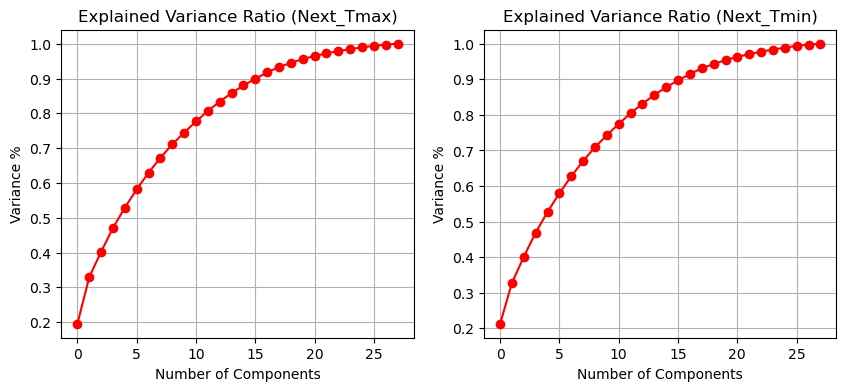

In [67]:
# Create PCA objects for each dataset
pca1 = PCA()
pca2 = PCA()

# Perform PCA for the first dataset (X_scale)
x_pca = pca1.fit_transform(X_scale)

# Perform PCA for the second dataset (X1_scale)
x1_pca = pca2.fit_transform(X1_scale)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca1.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio (Next_Tmax)')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca2.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance Ratio (Next_Tmin)')
plt.grid()

plt.show()

In [68]:
pca = PCA(n_components=15)
x_new = pca.fit_transform(X_scale)

principle_x = pd.DataFrame(x_new)
principle_x

0         1         2         3         4         5         6   \
0    -0.008548  2.760090 -2.212330 -1.024491  0.513860 -0.351440 -0.368094   
1    -0.894611  1.099074 -0.826061 -0.893430  0.986753  0.322949  0.925642   
2    -1.252525  0.006859  0.134557 -1.124688  0.946916 -0.206751  0.468677   
3    -0.518259  0.945434 -2.266122 -0.897944  0.842318  0.914819  0.708312   
4    -0.760375  0.918102 -0.990284  1.448736 -0.068828  0.661460  1.100479   
...        ...       ...       ...       ...       ...       ...       ...   
6734 -2.409744  5.008952  3.473266 -1.894895  1.144274  0.210441 -0.498622   
6735 -2.139230  5.328755  3.548837 -1.444553  1.598987  1.137286  0.892938   
6736 -2.374456  4.740525  4.327361 -1.223054  1.943396  0.841524  0.446891   
6737 -2.538827  4.445202  4.333823 -1.389167  1.833446  0.497952 -0.131023   
6738 -2.488180  4.695524  4.507730 -1.588928  1.603296 -0.120881 -0.711542   

            7         8         9         10        11        12        13  \
0    -0.445283  0.243323  0.464076 -1.817224 -0.896526  0.241169 -0.526495   
1    -1.188823  0.645606  0.393704 -1.861334 -0.528551 -0.053258 -0.528505   
2    -2.035906  1.002732  0.438883 -1.732448 -0.735790 -0.394055 -0.392395   
3    -0.758005  0.306947  0.463553 -1.885569 -0.593008  1.141071 -0.564182   
4    -0.804621  0.767586 -0.313105 -1.506494 -0.266309 -0.260684 -1.872767   
...        ...       ...       ...       ...       ...       ...       ...   
6734 -1.411113  0.521164 -1.288087  1.567664 -0.933215  0.854849  1.684827   
6735  0.058487  0.227861 -1.819070  1.644137 -0.408246  0.803963  0.140787   
6736  0.929844 -0.275755 -1.068801  0.998147 -1.010763  0.958989  1.338828   
6737  0.511413 -0.052338 -1.150437  1.180998 -1.026559  0.902003  1.438252   
6738 -0.785842  0.490444 -1.142393  1.570410 -1.042329  0.893246  1.832704   

            14  
0    -0.469059  
1    -0.301838  
2    -0.161665  
3    -0.987379  
4     0.872871  
...        ...  
6734 -0.359695  
6735  0.692203  
6736  0.076693  
6737 -0.054712  
6738 -0.293822  

[6739 rows x 15 columns]

In [69]:
pca = PCA(n_components=15)
x1_new = pca.fit_transform(X1_scale)

principle_x1 = pd.DataFrame(x1_new)
principle_x1

0         1         2         3         4         5         6   \
0     0.132661  2.902161 -1.885139 -1.095008 -0.506995 -0.403493 -0.328574   
1    -0.846145  1.229103 -0.605215 -0.897987 -0.988204  0.370784  0.879860   
2    -1.200907  0.279122  0.397509 -1.049545 -0.943276 -0.204065  0.459437   
3    -0.562858  1.395081 -1.992961 -0.990887 -0.826244  0.932187  0.665458   
4    -0.810272  0.884205 -1.092169  1.376350  0.091933  0.685859  1.075648   
...        ...       ...       ...       ...       ...       ...       ...   
6734 -1.981529  4.615063  3.946383 -1.343928 -1.038298  0.086505 -0.339162   
6735 -1.797545  4.746040  3.861645 -0.904819 -1.497379  1.126721  1.024067   
6736 -2.017021  4.272477  4.644676 -0.594596 -1.819711  0.784305  0.666010   
6737 -2.180040  4.091199  4.701723 -0.752339 -1.707192  0.398353  0.106310   
6738 -2.087388  4.149803  4.885739 -0.963613 -1.495713 -0.241868 -0.506625   

            7         8         9         10        11        12        13  \
0    -0.447867  0.312676  0.182269  1.716691 -1.056717  0.296239 -0.564849   
1    -1.215546  0.713594  0.106788  1.801850 -0.714051 -0.002314 -0.562976   
2    -2.035261  1.085574  0.127124  1.648397 -0.888486 -0.353409 -0.390107   
3    -0.780560  0.396238  0.126631  1.768226 -0.686382  1.151297 -0.582958   
4    -0.814855  0.833258 -0.540997  1.342201 -0.387851 -0.304170 -1.911147   
...        ...       ...       ...       ...       ...       ...       ...   
6734 -1.256079  0.579411 -1.246150 -1.918042 -0.583529  0.802428  1.792948   
6735  0.197960  0.282882 -1.721497 -2.047571 -0.041191  0.660656  0.225692   
6736  1.086737 -0.188698 -1.070103 -1.359100 -0.726320  0.921512  1.393581   
6737  0.688090  0.034765 -1.154059 -1.560131 -0.700949  0.845148  1.528351   
6738 -0.603957  0.549213 -1.104043 -1.904170 -0.696052  0.860410  1.924336   

            14  
0    -0.713985  
1    -0.524294  
2    -0.326839  
3    -1.241006  
4     0.662749  
...        ...  
6734 -0.143531  
6735  0.871198  
6736  0.176468  
6737  0.084618  
6738 -0.130434  

[6739 rows x 15 columns]

In [70]:
# Function to check for best random state and R2 score
def maxr2_score(tec, x, y):
    max_r_score = 0
    final_r_state = 0
    for r_state in range(1, 100):
        train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=r_state, test_size=0.20)
        tec.fit(train_x, train_y)
        pred = tec.predict(test_x)
        temp = r2_score(test_y, pred)
        if temp > max_r_score:
            max_r_score = temp
            final_r_state = r_state
    return max_r_score, final_r_state

In [71]:
# Initialize all the models
LR_model = LinearRegression()
RD_model = Ridge()
Lasso_model = Lasso()
DT_model = DecisionTreeRegressor()
SVR_model = SVR()
KNR_model = KNeighborsRegressor()
RFR_model = RandomForestRegressor()
SGH_model = SGDRegressor()
Bag_model = BaggingRegressor()
GB_model = GradientBoostingRegressor()
XGB_model = XGBRegressor()
ADA_model= AdaBoostRegressor()


# Create a list of models for iteration
models = [
    (LR_model, 'Linear Regression'),
    (RD_model, 'Ridge'),
    (Lasso_model, 'Lasso'),
    (DT_model, 'Decision Tree'),
    (SVR_model, 'SVR'),
    (KNR_model, 'KNeighbors'),
    (RFR_model, 'RandomForest'),
    (SGH_model, 'SGDRegressor'),
    (Bag_model, 'Bagging Regressor'),
    (GB_model, 'GradientBoostingRegressor'),
    (XGB_model, 'XGBRegressor'),
    (ADA_model, 'AdaBoostRegressor')
]

In [72]:
# Create a DataFrame to store the results
results = []

# Iterate through models and calculate the best random state and R2 score
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, principle_x, Y)
    results.append({'Model': model_name, 'Best R2 Score': max_r2, 'Best Random State': best_random_state})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df

Model  Best R2 Score  Best Random State
4                         SVR       0.865402                 84
10               XGBRegressor       0.846705                 10
5                  KNeighbors       0.846280                 99
6                RandomForest       0.836905                 29
8           Bagging Regressor       0.817407                 84
9   GradientBoostingRegressor       0.805427                 54
0           Linear Regression       0.778977                 84
1                       Ridge       0.778976                 84
7                SGDRegressor       0.777510                 84
11          AdaBoostRegressor       0.705310                 63
2                       Lasso       0.640429                 43
3               Decision Tree       0.638100                 71

In [73]:
# Create a DataFrame to store the results
results = []

# Iterate through models and calculate the best random state and R2 score
for model, model_name in models:
    max_r2, best_random_state = maxr2_score(model, principle_x1, Y1)
    results.append({'Model': model_name, 'Best R2 Score': max_r2, 'Best Random State': best_random_state})

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Sort the DataFrame by "Best R2 Score" in descending order
sorted_results_df = results_df.sort_values(by='Best R2 Score', ascending=False)
sorted_results_df

Model  Best R2 Score  Best Random State
4                         SVR       0.885705                 40
10               XGBRegressor       0.862890                 98
5                  KNeighbors       0.854160                 40
6                RandomForest       0.853666                 56
9   GradientBoostingRegressor       0.837513                 70
8           Bagging Regressor       0.835704                 83
0           Linear Regression       0.826109                 77
1                       Ridge       0.826107                 77
7                SGDRegressor       0.821928                 77
11          AdaBoostRegressor       0.765185                 56
3               Decision Tree       0.693840                 12
2                       Lasso       0.622049                 91

In [74]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(principle_x, Y, random_state=84, test_size=0.20)

# Define the hyperparameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(SVR_model, param_distributions=param_grid, n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
random_search.fit(principle_x, Y)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a regressor with the best parameters
best_SVR = SVR(**best_params)

# Fit the best regressor on the training data
best_SVR.fit(train_x, train_y)

# Make predictions on the test data
y_pred_SVR = best_SVR.predict(test_x)

# Evaluate the best model
r2_score_SVR = r2_score(test_y, y_pred_SVR)
print('Best R-squared Score (SVR):', r2_score_SVR)

mse = mean_squared_error(test_y, y_pred_SVR)
print('Best Mean -squared Score (SVR):', mse)

mae = mean_absolute_error(test_y, y_pred_SVR)
print('Best Mean -absolute Score (SVR):', mse)


Best R-squared Score (SVR): 0.7767766967802926
Best Mean -squared Score (SVR): 1.9933443547306422
Best Mean -absolute Score (SVR): 1.9933443547306422


In [75]:
# Data Splitting for Train & Test Data
train_x, test_x, train_y, test_y = train_test_split(principle_x1, Y1, random_state=40, test_size=0.20)

# Define the hyperparameter grid to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(SVR_model, param_distributions=param_grid, n_iter=30, scoring='r2', cv=5, n_jobs=-1)

# Fit the RandomizedSearchCV to your data
random_search.fit(train_x, train_y)

# Get the best hyperparameters
best_params = random_search.best_params_

# Create a regressor with the best parameters
best_SVR1 = SVR(**best_params)

# Fit the best regressor on the training data
best_SVR1.fit(train_x, train_y)

# Make predictions on the test data
y_pred_SVR1 = best_SVR1.predict(test_x)

# Evaluate the best model
r2_score_SVR1 = r2_score(test_y, y_pred_SVR1)
print('Best R-squared Score (SVR):', r2_score_SVR1)

mse = mean_squared_error(test_y, y_pred_SVR1)
print('Best Mean-squared Score (SVR):', mse)

mae = mean_absolute_error(test_y, y_pred_SVR1)
print('Best Mean-absolute Score (SVR):', mse)


Best R-squared Score (SVR): 0.9230345211140235
Best Mean-squared Score (SVR): 0.4412325962157802
Best Mean-absolute Score (SVR): 0.4412325962157802


In [76]:
# model for Next_Tmax
filename = 'Predict_Next_Tmax.pkl'
pickle.dump(best_SVR, open(filename, 'wb'))

In [77]:
# Model for Next Tmin
filename = 'Predict_Next_Tmin.pkl'
pickle.dump(best_SVR1, open(filename, 'wb'))